In [1]:
# import libraries
import numpy as np
import pandas as pd
import openpyxl 
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import json

warnings.filterwarnings('ignore')

from fuzzywuzzy import fuzz
from collections import defaultdict

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Data merge

### Sigwatch

In [2]:
# Directory containing your .dta files
directory_path = 'sigwatch_data/'

# List all the .dta files in the directory
all_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f)) and f.endswith('.dta')]

# Read and append all dataframes into a list
dfs = [pd.read_stata(os.path.join(directory_path, file)) for file in all_files]

# Concatenate all dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)

# Now you can use merged_df as required
merged_df

,uid_archive,date,company_code,company,company_type,company_parent_code,company_parent,company_parent_country,sentiment,prominence,...,industry_sector_code3,industry_sector3,industry_sector_code4,industry_sector4,report,link1,link2,link3,link4,link5
0,40934,2011-12-21,18,AREVA,Parent,18,AREVA,France,-2,4,...,NaN,,NaN,NaN,"In France, France Nature Environnement (FNE) a...",http://www.fne.asso.fr/fr/pollution-de-cours-...,,,,NaN
1,40934,2011-12-21,3849,Comurhex,Subsidiary,18,AREVA,France,-2,4,...,NaN,,NaN,NaN,"In France, France Nature Environnement (FNE) a...",http://www.fne.asso.fr/fr/pollution-de-cours-...,,,,NaN
2,40931,2011-12-21,1,Monsanto,Parent,1,Monsanto,US,-1,2,...,1279.0,Agriculture,NaN,NaN,"In Bulgaria, Public Environmental Center for S...",http://novinite.com/view_news.php?id=134782,,,,NaN
3,40927,2011-12-21,227,Nestle,Parent,227,Nestle,Switzerland,-2,4,...,NaN,,NaN,NaN,of the baby food companies based on the scale...,http://info.babymilkaction.org/pressrelease/pr...,,,,NaN
4,40924,2011-12-21,3847,Kazmunaigas Exploration and Production,Parent,3847,Kazmunaigas Exploration and Production,Kazakhstan,-2,4,...,NaN,,NaN,NaN,"In the UK, Platform is mobilising supporters t...",http://blog.platformlondon.org/2011/12/20/demo...,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73089,80421,2018-01-04,14894,Maxim's MX,Subsidiary,14893,Maxim's Group,Hong Kong SAR of China,-2,2,...,1432.0,Quick Service Restaurants,NaN,NaN,HONG KONG - Greenpeace attempted a publicity s...,http://www.greenpeace.org/hk/press/releases/oc...,https://drive.google.com/file/d/1an-iT8A07KYDF...,,,NaN
73090,80421,2018-01-04,14895,Yoshinoya,Parent,14895,Yoshinoya,Japan,-2,2,...,1432.0,Quick Service Restaurants,NaN,NaN,HONG KONG - Greenpeace attempted a publicity s...,http://www.greenpeace.org/hk/press/releases/oc...,https://drive.google.com/file/d/1an-iT8A07KYDF...,,,NaN
73091,80421,2018-01-04,14896,Cafe de Coral Group,Parent,14896,Cafe de Coral Group,Hong Kong SAR of China,-2,2,...,1432.0,Quick Service Restaurants,NaN,NaN,HONG KONG - Greenpeace attempted a publicity s...,http://www.greenpeace.org/hk/press/releases/oc...,https://drive.google.com/file/d/1an-iT8A07KYDF...,,,NaN
73092,80421,2018-01-04,14897,Fairwood,Parent,14897,Fairwood,Hong Kong SAR of China,-2,2,...,1432.0,Quick Service Restaurants,NaN,NaN,HONG KONG - Greenpeace attempted a publicity s...,http://www.greenpeace.org/hk/press/releases/oc...,https://drive.google.com/file/d/1an-iT8A07KYDF...,,,NaN


In [3]:
merged_df.to_csv('sigwatch_merged.csv')

### Banks_ri with Scandinavian

In [4]:

# Load the Excel file, skipping the first sheet and reading the others
xls = pd.ExcelFile("banks_data_bocconi/banks_ri_scandinavian.xlsx")
sheet_names = xls.sheet_names[1:]  # Ignore the first sheet

dataframes = {}
for sheet in sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet, index_col="Name")
    #rename the index from Name to Date
    df.index.name = 'Date'
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.').astype(float)
    # Convert columns to a MultiIndex
    df.columns = pd.MultiIndex.from_product([[sheet], df.columns])
    dataframes[sheet] = df

# Concatenate the dataframes
final_df = pd.concat(dataframes.values(), axis=1)

final_df

BD                                  \
           AAREAL BANK - TOT RETURN IND COMDIRECT BANK - TOT RETURN IND   
Date                                                                      
2008-01-01                       182.27                           33.09   
2008-01-02                       183.81                           33.05   
2008-01-03                       181.73                           33.05   
2008-01-04                       173.31                           33.09   
2008-01-07                       167.91                           33.20   
...                                 ...                             ...   
2020-11-13                          NaN                             NaN   
2020-11-16                          NaN                             NaN   
2020-11-17                          NaN                             NaN   
2020-11-18                          NaN                             NaN   
2020-11-19                          NaN                             NaN   

                                                                            \
           COMMERZBANK - TOT RETURN IND DT.PFANDBRIEFBANK - TOT RETURN IND   
Date                                                                         
2008-01-01                       974.59                                NaN   
2008-01-02                       956.43                                NaN   
2008-01-03                       944.94                                NaN   
2008-01-04                       939.75                                NaN   
2008-01-07                       943.08                                NaN   
...                                 ...                                ...   
2020-11-13                          NaN                                NaN   
2020-11-16                          NaN                                NaN   
2020-11-17                          NaN                                NaN   
2020-11-18                          NaN                                NaN   
2020-11-19                          NaN                                NaN   

                                                                           \
           PROCREDIT HOLDING - TOT RETURN IND UMWELTBANK - TOT RETURN IND   
Date                                                                        
2008-01-01                                NaN                      260.15   
2008-01-02                                NaN                      259.22   
2008-01-03                                NaN                      261.69   
2008-01-04                                NaN                      263.24   
2008-01-07                                NaN                      259.37   
...                                       ...                         ...   
2020-11-13                                NaN                         NaN   
2020-11-16                                NaN                         NaN   
2020-11-17                                NaN                         NaN   
2020-11-18                                NaN                         NaN   
2020-11-19                                NaN                         NaN   

                                                                    \
           ALLIANZ - TOT RETURN IND DEUTSCHE BANK - TOT RETURN IND   
Date                                                                 
2008-01-01                  3364.43                        1937.46   
2008-01-02                  3304.22                        1900.87   
2008-01-03                  3285.59                        1900.00   
2008-01-04                  3220.61                        1881.60   
2008-01-07                  3179.94                        1880.52   
...                             ...                            ...   
2020-11-13                      NaN                            NaN   
2020-11-16                      NaN                            NaN   
2020-11-17                      NaN         

In [5]:
final_df.to_csv('banks_ri_merged.csv')

# Data cleaning

In [6]:
banks_ri = pd.read_csv('banks_ri_merged.csv', index_col=0)
sigwatch = pd.read_csv('sigwatch_merged.csv', index_col=0)

risk_free = pd.read_excel('banks_data_bocconi/risk_free_rate.xlsm', 'DAILY',index_col=0)
eu_3fact = pd.read_excel('banks_data_bocconi/Europe_3_Factors_Daily.xlsx', index_col=0)
us_3fact = pd.read_excel('banks_data_bocconi/North_America_3_Factors_Daily.xlsx', index_col=0)

### Risk-free dataset

In [7]:
risk_free = risk_free[['Unnamed: 1', 'Unnamed: 2']]

In [8]:
# chamge the name of the columns of risk free rate in 'US T-BILL SEC MARKET 3 MONTH (D) - MIDDLE RATE' and 'US T-BILL SEC MARKET 4 WEEK (D) - MIDDLE RATE'
risk_free.columns = ['US T-BILL SEC MARKET 3 MONTH (D) - MIDDLE RATE', 'US T-BILL SEC MARKET 4 WEEK (D) - MIDDLE RATE']
# remove first two rows of risk free rate
risk_free = risk_free.iloc[2:]

In [9]:
risk_free

,US T-BILL SEC MARKET 3 MONTH (D) - MIDDLE RATE,US T-BILL SEC MARKET 4 WEEK (D) - MIDDLE RATE
SERIES DS,,
2008-01-01,3.29,2.61
2008-01-02,3.18,3.02
2008-01-03,3.16,3.13
2008-01-04,3.12,3.16
2008-01-07,3.19,3.21
...,...,...
2020-11-16,0.09,0.09
2020-11-17,0.09,0.08
2020-11-18,0.09,0.07


### Banks_ri dataset

In [10]:
# in the columns preserve only the letters not numbers and special characters
banks_ri.columns = banks_ri.columns.str.replace('[^a-zA-Z]', '')

# remove the row indexed 'Date'
banks_ri = banks_ri.drop(['Date'], axis=0)

# replace the first value of the index with 'Date'
banks_ri.index.values[0] = 'Date'

# create the multiindex
banks_ri.columns = pd.MultiIndex.from_arrays([banks_ri.columns, banks_ri.iloc[0]])
banks_ri = banks_ri.drop(banks_ri.index[0])

There must be numeric values (floats)

In [11]:
banks_ri = banks_ri.astype(float)

Format the column names so to have only the name of the bank

In [12]:
old = banks_ri.columns.levels[1].tolist()
# replace from the old the ending ' - TOT RETURN IND'
new = [x.replace(' - TOT RETURN IND', '') for x in old]

# replace the old with the new
banks_ri.columns.set_levels(new, level=1, inplace=True)

Create one dataset for european banks and other for US banks

In [13]:
# Create a dataframe with only the 'US' bank columns
us_banks_ri = banks_ri.loc[:, banks_ri.columns.get_level_values(0) == 'US']

# Create a dataframe excluding the 'US' bank columns
eu_banks_ri = banks_ri.loc[:, banks_ri.columns.get_level_values(0) != 'US']


In [14]:
eu_banks_ri

BD                                               \
Date       AAREAL BANK COMDIRECT BANK COMMERZBANK DT.PFANDBRIEFBANK   
2008-01-01      182.27          33.09      974.59               NaN   
2008-01-02      183.81          33.05      956.43               NaN   
2008-01-03      181.73          33.05      944.94               NaN   
2008-01-04      173.31          33.09      939.75               NaN   
2008-01-07      167.91          33.20      943.08               NaN   
...                ...            ...         ...               ...   
2020-11-13         NaN            NaN         NaN               NaN   
2020-11-16         NaN            NaN         NaN               NaN   
2020-11-17         NaN            NaN         NaN               NaN   
2020-11-18         NaN            NaN         NaN               NaN   
2020-11-19         NaN            NaN         NaN               NaN   

                                                                \
Date       PROCREDIT HOLDING UMWELTBANK  ALLIANZ DEUTSCHE BANK   
2008-01-01               NaN     260.15  3364.43       1937.46   
2008-01-02               NaN     259.22  3304.22       1900.87   
2008-01-03               NaN     261.69  3285.59       1900.00   
2008-01-04               NaN     263.24  3220.61       1881.60   
2008-01-07               NaN     259.37  3179.94       1880.52   
...                      ...        ...      ...           ...   
2020-11-13               NaN        NaN      NaN           NaN   
2020-11-16               NaN        NaN      NaN           NaN   
2020-11-17               NaN        NaN      NaN           NaN   
2020-11-18               NaN        NaN      NaN           NaN   
2020-11-19               NaN        NaN      NaN           NaN   

                                     BG             ...       NW           \
Date       BANQUE NATIONALE DE BELGIQUE KBC ANCORA  ...      DNB   MYBANK   
2008-01-01                      2658.11     412.30  ...  1755.09      NaN   
2008-01-02                      2684.50     405.01  ...  1776.23      NaN   
2008-01-03                      2682.82     396.98  ...  1738.17      NaN   
2008-01-04                      2641.91     394.32  ...  1721.26      NaN   
2008-01-07                      2632.54     400.65  ...  1721.26      NaN   
...                                 ...        ...  ...      ...      ...   
2020-11-13                          NaN        NaN  ...  5102.13  1285.71   
2020-11-16                          NaN        NaN  ...  5205.60  1642.86   
2020-11-17                          NaN        NaN  ...  5270.05  1642.86   
2020-11-18                          NaN        NaN  ...  5426.11  1642.86   
2020-11-19                          NaN        NaN  ...  5329.42  1642.86   

                                                           \
Date       NORWEGIAN FINANS HOLDING SPAREBANK 1 OSTLANDET   
2008-01-01                      NaN                   NaN   
2008-01-02                      NaN                   NaN   
2008-01-03                      NaN                   NaN   
2008-01-04                      NaN                   NaN   
2008-01-07                      NaN                   NaN   
...                             ...                   ...   
2020-11-13                    91.63                134.35   
2020-11-16                    93.80                134.94   
2020-11-17                    91.25                135.98   
2020-11-18                    89.58                137.30   
2020-11-19                    88.31                135.98   

                                                                     SD  \
Date       SPAREBANK 1 SMN ORDS SPAREBANK 1 SR-BANK AVANZA BANK HOLDING   
2008-01-01              1038.09             1345.10             2221.74   
2008-01-02              1041.68             1340.02             2242.24   
2008-01-03              1048.86             1329.87             2229.94   
2008-01-04              1052.46             1340.02             21

### 3 factors datasets


convert the datetime 

In [15]:
eu_3fact.index = pd.to_datetime(eu_3fact.index)
eu_3fact.index = eu_3fact.index.strftime('%Y-%m-%d')

us_3fact.index = pd.to_datetime(us_3fact.index)
us_3fact.index = us_3fact.index.strftime('%Y-%m-%d')

select only the data in the same period

In [16]:
# i want the same datetime period in the indexes of the dataframes
start_date = '2008-01-01' #the initial date in banks_ri 
end_date = '2020-09-30'  # the last date in eu_3fact

dates_to_consider = pd.date_range(start_date, end_date)
dates_to_consider = dates_to_consider.strftime('%Y-%m-%d')

# Problem: the weekends are in banks_ri but not in eu_3fact
# Solution: take the intersection of the two indexes
three_fact_dates = eu_3fact.index.intersection(dates_to_consider)

In [17]:
eu_3fact = eu_3fact.loc[three_fact_dates]
us_3fact = us_3fact.loc[three_fact_dates]

eu_banks_ri = eu_banks_ri.loc[three_fact_dates]
us_banks_ri = us_banks_ri.loc[three_fact_dates]

In [18]:
print("Dimensions of eu_3fact:")
print(eu_3fact.shape)

print("Dimensions of us_3fact:")
print(us_3fact.shape)

print("Dimensions of eu_banks_ri:")
print(eu_banks_ri.shape)

print("Dimensions of us_banks_ri:")
print(us_banks_ri.shape)


Dimensions of eu_3fact:
(3327, 4)
Dimensions of us_3fact:
(3327, 4)
Dimensions of eu_banks_ri:
(3327, 126)
Dimensions of us_banks_ri:
(3327, 59)


Here we go!

# Task 4: **CAPM**

## Data preparation

First of all we have to compute the daily returns for bank shares since we have only indication of the price. We will use the following formula:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

where $P_t$ is the price of the share at time $t$.


In [19]:
def daily_returns(df):
    # calculate the daily returns preserving nan values
    df = df.pct_change()
    return df


# calculate the daily returns
eu_banks_returns = daily_returns(eu_banks_ri)
us_banks_returns = daily_returns(us_banks_ri)

## Computation of (rolling) Alpha and Beta

We proceed by applying the OLS regression to compute the alpha and beta of each bank on a rolling window of 60 days. We will use the following formula:

$$
r_{i,t} = \alpha_i + \beta_i r_{m,t} + \epsilon_{i,t}
$$

where $r_{i,t}$ is the return of the bank $i$ at time $t$, $r_{m,t}$ is the return of the market at time $t$ and $\epsilon_{i,t}$ is the error term.

In [20]:
def compute_capm_coefficients(banks_return, three_factors, window_size=250):
    # Lists to store results for the multi-index DataFrame
    indices = []
    alpha_list = []
    beta_list = []
    pvalue_alpha_list = []
    pvalue_beta_list = []

    for country, bank in banks_return.columns:
        # Create a dataframe to store the bank's returns and the 3 factors
        df = pd.concat([banks_return[country, bank], three_factors], axis=1)
        
        # Drop the rows with missing values
        df = df.dropna()

        # Drop rows with all zeros
        df = df.loc[(df != 0).any(axis=1)]
        
        # Iterate over non-overlapping windows
        for start in range(0, len(df) - window_size + 1, window_size):
            window = df.iloc[start:start + window_size]
            
            # Extract the start and end dates of the window
            start_date = window.index[0]
            end_date = window.index[-1]

            # Split the dataframe into X and y for this window
            X = window['Mkt-RF']/100 + window['RF']/100
            y = window.iloc[:, 0]

            # Add a constant
            X = sm.add_constant(X)

            # Create and fit the regression model for this window
            model = sm.OLS(y, X).fit()

            # Add results to the lists
            indices.append((country, bank, start_date, end_date))  # Using the start and end dates in the index
            alpha_list.append(model.params['const'])
            beta_list.append(model.params[0])
            pvalue_alpha_list.append(model.pvalues['const'])
            pvalue_beta_list.append(model.pvalues[0])

    # Convert lists into a multi-index DataFrame
    multi_index = pd.MultiIndex.from_tuples(indices, names=['Country', 'Bank', 'Start_Date', 'End_Date'])
    df_results = pd.DataFrame({
        'Alpha': alpha_list,
        'Beta': beta_list,
        'P-value Alpha': pvalue_alpha_list,
        'P-value Beta': pvalue_beta_list
    }, index=multi_index)

    return df_results


In [21]:
# Apply the function to the European banks
eu_banks_capm = compute_capm_coefficients(eu_banks_returns, eu_3fact)
us_banks_capm = compute_capm_coefficients(us_banks_returns, us_3fact)

In [22]:
eu_banks_capm

Alpha      Beta  P-value Alpha  \
Country Bank        Start_Date End_Date                                        
BD      AAREAL BANK 2008-01-02 2008-12-16 -0.001922  1.469080       0.548685   
                    2008-12-17 2009-12-01  0.002696  1.636609       0.273872   
                    2009-12-02 2010-11-16  0.001860  1.173698       0.168036   
                    2010-11-17 2011-11-01 -0.000365  1.711333       0.837161   
                    2011-11-02 2012-10-16  0.000585  1.777332       0.680218   
...                                             ...       ...            ...   
SD      SWEDBANK A  2015-09-02 2016-08-16  0.000215  0.917883       0.786087   
                    2016-08-17 2017-08-01  0.000395  0.554497       0.463533   
                    2017-08-02 2018-07-17 -0.000185  0.670541       0.743539   
                    2018-07-18 2019-07-02 -0.000655  0.717436       0.562087   
                    2019-07-03 2020-06-16 -0.000235  0.973346       0.838228   

                                           P-value Beta  
Country Bank        Start_Date End_Date                  
BD      AAREAL BANK 2008-01-02 2008-12-16  4.120730e-24  
                    2008-12-17 2009-12-01  2.031768e-26  
                    2009-12-02 2010-11-16  2.492800e-27  
                    2010-11-17 2011-11-01  1.961643e-40  
                    2011-11-02 2012-10-16  3.449968e-44  
...                                                 ...  
SD      SWEDBANK A  2015-09-02 2016-08-16  3.063319e-36  
                    2016-08-17 2017-08-01  4.104778e-10  
                    2017-08-02 2018-07-17  3.137527e-13  
                    2018-07-18 2019-07-02  7.657408e-07  
                    2019-07-03 2020-06-16  3.051105e-33  

[1414 rows x 4 columns]

In [23]:
# in eu_bank_capm check which alpha are signiifcantly different from zero
eu_banks_capm[eu_banks_capm['P-value Alpha'] < 0.05]

Alpha  \
Country Bank                         Start_Date End_Date               
BD      AAREAL BANK                  2018-07-18 2019-07-02 -0.001818   
        COMMERZBANK                  2010-11-17 2011-11-01 -0.003465   
BG      BANQUE NATIONALE DE BELGIQUE 2013-10-02 2014-09-16  0.001102   
        KBC ANCORA                   2010-11-17 2011-11-01 -0.003137   
                                     2012-10-17 2013-10-01  0.002418   
...                                                              ...   
NW      DNB                          2016-08-17 2017-08-01  0.001517   
        SPAREBANK 1 SMN ORDS         2016-08-17 2017-08-01  0.001697   
        SPAREBANK 1 SR-BANK          2016-08-17 2017-08-01  0.002630   
SD      AVANZA BANK HOLDING          2008-12-17 2009-12-01  0.002954   
                                     2019-07-03 2020-06-16  0.002898   

                                                                Beta  \
Country Bank                         Start_Date End_Date               
BD      AAREAL BANK                  2018-07-18 2019-07-02  0.921354   
        COMMERZBANK                  2010-11-17 2011-11-01  1.550054   
BG      BANQUE NATIONALE DE BELGIQUE 2013-10-02 2014-09-16  0.254969   
        KBC ANCORA                   2010-11-17 2011-11-01  1.562828   
                                     2012-10-17 2013-10-01  1.681257   
...                                                              ...   
NW      DNB                          2016-08-17 2017-08-01  0.756452   
        SPAREBANK 1 SMN ORDS         2016-08-17 2017-08-01  0.540480   
        SPAREBANK 1 SR-BANK          2016-08-17 2017-08-01  0.664634   
SD      AVANZA BANK HOLDING          2008-12-17 2009-12-01  0.399866   
                                     2019-07-03 2020-06-16  0.778778   

                                                            P-value Alpha  \
Country Bank                         Start_Date End_Date                    
BD      AAREAL BANK                  2018-07-18 2019-07-02       0.024678   
        COMMERZBANK                  2010-11-17 2011-11-01       0.019188   
BG      BANQUE NATIONALE DE BELGIQUE 2013-10-02 2014-09-16       0.047752   
        KBC ANCORA                   2010-11-17 2011-11-01       0.047895   
                                     2012-10-17 2013-10-01       0.033925   
...                                                                   ...   
NW      DNB                          2016-08-17 2017-08-01       0.044161   
        SPAREBANK 1 SMN ORDS         2016-08-17 2017-08-01       0.026720   
        SPAREBANK 1 SR-BANK          2016-08-17 2017-08-01       0.001335   
SD      AVANZA BANK HOLDING          2008-12-17 2009-12-01       0.008912   
                                     2019-07-03 2020-06-16       0.044398   

                                                            P-value Beta  
Country Bank                         Start_Date End_Date                  
BD      AAREAL BANK                  2018-07-18 2019-07-02  2.266324e-17  
        COMMERZBANK                  2010-11-17 2011-11-01  1.300174e-45  
BG      BANQUE NATIONALE DE BELGIQUE 2013-10-02 2014-09-16  2.765506e-03  
        KBC ANCORA                   2010-11-17 2011-11-01  5.938596e-42  
                                     2012-10-17 2013-10-01  1.328272e-27  
...                                                                  ...  
NW      DNB                          2016-08-17 2017-08-01  9.085701e-10  
        SPAREBANK 1 SMN ORDS         2016-08-17 2017-08-01  1.123564e-05  
        SPAREBANK 1 SR-BANK          2016-08-17 2017-08-01  4.628775e-07  
SD      AVANZA BANK HOLDING          2008-12-17 2009-12-01  6.716695e-10  
                                     2019-07-03 2020-06-16  6.474633e-17  

[74 rows x 4 columns]

# Task 5: **CARs**

## Sigwatch Dataset: data preparation

First of all we filter the data to have only the data of the banks we are interested in. 

In [24]:
sigwatch.shape

(73094, 94)

In [25]:
sigwatch = sigwatch[sigwatch['industry_sector1'].str.contains("Finance") & sigwatch['corp_industry_sector1'].str.contains("Finance")]
sigwatch = sigwatch.dropna(subset=['company', 'company_parent'], how='all')
sigwatch = sigwatch.dropna(subset=['link1'], how='all')
sigwatch.reset_index(drop=True, inplace=True)
sigwatch.shape


(4344, 94)

Now we filter out the rows referring to Country for which we do not have data at our disposal (on company_parent_country)

In [26]:
def load_dict_from_file(file_path):
    with open(file_path, 'r') as f:
        dictionary = json.load(f)
    return dictionary

Banks events is a dictionary which has the country as key and the list of banks (of that country) in our dataset as value.

In [27]:
banks_events = load_dict_from_file('dictionary_to_event.json')
countries = banks_events.keys()

In [28]:
sigwatch = sigwatch[sigwatch['company_parent_country'].isin(countries)]
sigwatch.reset_index(drop=True, inplace=True)

In [29]:
sigwatch.shape

(3177, 94)

Now we proceed column by column in the banks to detect events from sigwatch dataset

In [30]:
def find_primary_key(outer_dict, target_key):
    for primary_key, nested_dict in outer_dict.items():
        if target_key in nested_dict:
            return primary_key
    return None

We use the fuzzy ratio to detect the events based on the similarity of the bank names as they appear in the two datasets. The threshold is set to 70% (the similarity must be at least 70% to be considered as the same bank) which is good since we consider banks within the same country.

In [31]:
# function to match banks name that may be written slighlty differently
def is_close_match(bank_stock, bank_sigwatch, threshold=70):
    bank_stock = str(bank_stock).lower()
    bank_sigwatch = str(bank_sigwatch).lower()
    return fuzz.ratio(bank_stock, bank_sigwatch) >= threshold

In [32]:
# merge data based on close-match score
for bank_name in banks_ri.columns.levels[1].tolist():
    primary_key = find_primary_key(banks_events, bank_name)
    banks_events[primary_key][bank_name] = []
    for row in range(len(sigwatch)):
        if sigwatch.loc[row,'company_parent_country'] != primary_key:
            continue
        if sigwatch.loc[row, 'company_type'] == 'parent':
            if is_close_match(bank_name, sigwatch.loc[row, 'company']):
                banks_events[primary_key][bank_name].append(sigwatch.loc[row, 'date'])
        else:
            if is_close_match(bank_name, sigwatch.loc[row, 'company_parent']):
                banks_events[primary_key][bank_name].append(sigwatch.loc[row, 'date'])

In [33]:
def flatten_nested_dict(nested_dict):
    flattened_dict = {key: value for sub_dict in nested_dict.values() for key, value in sub_dict.items()}
    return flattened_dict

By doing this we are able to provide a dictionary with the name of every bank as it appears in the banks dataset as key and the list of events dates as values.

In [34]:
banks_events_flattened = flatten_nested_dict(banks_events)

banks_events_flattened.keys()

dict_keys(['AAREAL BANK', 'COMDIRECT BANK', 'COMMERZBANK', 'DT.PFANDBRIEFBANK', 'PROCREDIT HOLDING', 'UMWELTBANK', 'ALLIANZ', 'DEUTSCHE BANK', 'BANQUE NATIONALE DE BELGIQUE', 'KBC ANCORA', 'KBC GROUP', 'BANK OF CYPRUS HOLDING', 'HELLENIC BANK', 'LHV GROUP', 'BBV.ARGENTARIA', 'BANCO DE SABADELL', 'BANCO SANTANDER', 'BANKIA', "BANKINTER 'R'", 'CAIXABANK', 'LIBERBANK', 'UNICAJA BANCO', 'AKTIA BANK A', 'NORDEA BANK', 'BNP PARIBAS', 'CRCAM ILLE-VIL.CCI', 'CRCAM NORD CCI', 'CREDIT AGRICOLE', 'CREDIT AGRICOLE BRIE PICARDIE', 'CREDIT AGR.ILE DE FRANCE', 'CREDIT FONCIER DE MONACO', 'NATIXIS', 'SOCIETE GENERALE', 'BANQUE DE SAVOIE DEAD - 01/04/10', 'CREDIT AGRICOLE.1', 'MERSEN (EX LCL)', 'ALPHA BANK', 'ATTICA BANK', 'BANK OF GREECE', 'BANK OF PIRAEUS', 'EUROBANK HOLDINGS', 'NATIONAL BK.OF GREECE', 'AIB GROUP', 'BANK OF IRELAND GROUP', 'PERMANENT TSB GHG.', 'BANCA GENERALI', 'BANCA MONTE DEI PASCHI', 'BCA.PICCOLO CDT.VALTELL', 'BANCA PPO.DI SONDRIO', 'BANCO BPM', 'BNC.DI DESIO E DELB.', 'BPER BAN

Problems:
- Nordea is in Finland, but for Sigwatch it's in Sweden so no match

## CARs computation

The Cumulative Abnormal Return (CAR) is calculated using a straightforward formula based on the abnormal returns during the event window. The formula for CAR can be expressed as:

$$
CAR_i = \sum_{t=T_1}^{T_2} AR_{i,t}
$$

Where:

- $CAR_i$ is the cumulative abnormal return for bank $i$
- $AR_{i,t}$ is the abnormal return for bank $i$ at time $t$
- $T_1$ is the starting time of the event window
- $T_2$ is the ending time of the event window

The abnormal return is calculated as:

$$
AR_{i,t} = r_{i,t} - (\alpha_i + \beta_i*(r_{m,t} - r_{f,t}))
$$

Where:

- $r_{i,t}$ is the return of the bank $i$ at time $t$
- $r_{m,t}$ is the return of the market at time $t$
- $r_{f,t}$ is the risk-free rate at time $t$
- $\beta_i$ is the beta of the bank $i$ computed using the CAPM model on a time window of 250 days starting from 50 days before the event
- $\alpha_i$ is the alpha of the bank $i$ computed using the CAPM model on a time window of 250 days starting from 50 days before the event

The event window is defined as the 10 days before and the 10 days after the event.

### Functions 

- a function called compute_CAPM_coefficients which computes the CAPM coefficients (alpha and beta) on a rolling window of 250 days starting from 50 days before the event

- a function called compute_CAR which computes the CARs for each bank on a event window of 10 days before and 10 days after the event

In [35]:
def compute_CAPM_coefficients(banks_return, three_factors, bank, event_date, estimation_window_size=250):
    # Convert the string event date to a datetime object
    event_date = pd.to_datetime(event_date)

    # CAPM parameters estimation window
    start_date = str(pd.Timestamp((event_date - pd.Timedelta(days=estimation_window_size+50))).date())
    end_date = str(pd.Timestamp((event_date - pd.Timedelta(days=50))).date())

    estimation_window = banks_return.loc[start_date:end_date, bank]

    # Getting the corresponding market and risk-free rates
    market_window = three_factors.loc[start_date:end_date, 'Mkt-RF'] / 100
    rf_window = three_factors.loc[start_date:end_date, 'RF'] / 100

    X = market_window + rf_window
    y = estimation_window

    # Regression to get the alpha and beta estimates
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    alpha_hat = model.params['const']
    beta_hat = model.params[0]

    return alpha_hat, beta_hat

In [36]:
def compute_CAR(banks_return, three_factors, events_dict, estimation_window_size=250, event_window=10):
    # Dictionary to store CAR results
    CAR_results = {}
    ab_res = {}

    # If the dataframe has a MultiIndex, drop the top level
    if isinstance(banks_return.columns, pd.MultiIndex):
        banks_return = banks_return.droplevel(0, axis=1)

    for bank, event_dates in events_dict.items():
        # Check if the bank exists in the banks_return dataframe
        if bank not in banks_return.columns:
            #print(f"Bank {bank} not found in the returns dataset. Skipping...")
            continue
        
        ab_res[bank] = {}
        bank_CAR = []
        for event_date in event_dates:
            # Convert the string event date to a datetime object
            event_date = pd.to_datetime(event_date)

            # Get CAPM coefficients
            alpha_hat, beta_hat = compute_CAPM_coefficients(banks_return, three_factors, bank, event_date, estimation_window_size)

            # Compute Abnormal Returns for the event window
            event_start = str((event_date - pd.Timedelta(days=event_window)).date())
            event_end = str((event_date + pd.Timedelta(days=event_window)).date())


            actual_returns = banks_return.loc[event_start:event_end, bank]
            market_returns = three_factors.loc[event_start:event_end, 'Mkt-RF'] / 100
            rf_rates = three_factors.loc[event_start:event_end, 'RF'] / 100

            expected_returns = alpha_hat + beta_hat * (market_returns)
            abnormal_returns = actual_returns - expected_returns

            # Step 3: Compute CAR
            CAR = abnormal_returns.sum()
            bank_CAR.append([str(event_date.date()),CAR])
            ab_res[bank][event_date] = abnormal_returns
        
        CAR_results[bank] = bank_CAR

    return CAR_results, ab_res


In [37]:
car_eu, ab_res_eu = compute_CAR(eu_banks_returns, eu_3fact, banks_events_flattened, estimation_window_size=250, event_window=30)

In [38]:
car_us, ab_res_us = compute_CAR(us_banks_returns, us_3fact, banks_events_flattened, estimation_window_size=250, event_window=30)

# Task 6: **Do NGOs campaigns matter ?**

First of all we create a function to merge the CARs of each EU bank and sentiment scores in a single dataframe:

In [39]:
# function to merge the CARs of each EU bank and sentiment scores in a single dataframe
def create_df_eu(car_eu, ab_ret_eu, mkt_df):
    # create a dataframe with CAR values of each bank for each event date
    df = pd.DataFrame(columns=['date', 'CAR'])
    for bank in car_eu.keys():
        # concatenate the cars of all banks
        df = pd.concat([df, pd.DataFrame(car_eu[bank], columns=['date', 'CAR'], index=[bank]*len(car_eu[bank]))], axis=0)
        
    # merge df with excess market daily returns
    df = df.merge(mkt_df, left_on='date', right_index=True)
    # create a columns with banks name in order to merge the dataframe to sigwatch
    df['bank'] = ''

    for row in range(len(df)):
        pot_names = sigwatch[['date','company_parent','sentiment']][sigwatch['date'] == df.iloc[row,0]]
        for line in range(len(pot_names)):
            if is_close_match(df.index[row], pot_names.iloc[line,1], threshold=70):
                df.iloc[row,3] = pot_names.iloc[line,1]
                
    d = {'AAREAL BANK': '', 'ADMIRAL_GROUP': 'Admiral Group', 'BANCO DE SABADELL': 'Banco Sabadell', 
        'BANCO SANTANDER':'Grupo Santander', 'BANQUE CANTONALE VAUDOISE':'BCV Banque Cantonale Vaudoise',
        'ING GROEP':'','LUZERNER KANTONALBANK':'','SAGA GROUP':'Saga Group','THURGAUER KANTONALBANK':'','WALLISER KANTONALBANK':'','ZUGER KANTONALBANK':''}

    # correct the banks name
    for row in range(len(df)):
        if df.index[row] in d.keys():
            df.iloc[row,3] = d[df.index[row]]
            
    # drop rows with empty bank name
    df = df[df['bank'] != '']

    # set the index as a columns
    df.reset_index(inplace=True)
    # merge the column sentiment of sigwatch with df using date and bank keeping the same index of df
    df = df.merge(sigwatch[['date','company_parent','sentiment','prominence']], left_on=['date','bank'], right_on=['date','company_parent'])
    
    # add dummy variable to indicate if te event is before or after COP21
    df['postCOP21'] = 0
    df['postCOP21'][df['date'] >= '2015-12-12'] = 1
    
    # change prominence values to 1 if the value is greater than 2, 0 otherwise
    df['prominence'][df['prominence'] <= 2] = 0
    df['prominence'][df['prominence'] > 2] = 1

    # add a columns for the interaction between sentiment and prominence
    df['sentiment_prominence'] = df['sentiment'] * df['prominence']
    
    return df
    

In [40]:
# function to create a df storing for each bank, car values, date, market returns, bank name and sentiment
def create_df_us(car_us, ab_ret_us, mkt_df):    
    df = pd.DataFrame(columns=['date', 'CAR'])
    for bank in car_us.keys():
        # concatenate the cars of all banks
        df = pd.concat([df, pd.DataFrame(car_us[bank], columns=['date', 'CAR'], index=[bank]*len(car_us[bank]))], axis=0)
        
    # merge df with excess market daily returns
    df = df.merge(mkt_df, left_on='date', right_index=True)
    # create a columns with banks name in order to merge the dataframe to sigwatch
    df['bank'] = ''

    for row in range(len(df)):
        pot_names = sigwatch[['date','company_parent','sentiment']][sigwatch['date'] == df.iloc[row,0]]
        for line in range(len(pot_names)):
            if is_close_match(df.index[row], pot_names.iloc[line,1], threshold=70):
                df.iloc[row,3] = pot_names.iloc[line,1]
                
    d = {'ALLY FINANCIAL':'', 'AMERICAN EXPRESS': 'American Express Company', 'CIT GROUP': 'Citigroup',
        'M&T BANK':'M&T Bank', 'PACWEST BANCORP': '','TCF FINANCIAL': '', 'TFS FINANCIAL': '', 'TRUIST FINANCIAL': '', 
        }

    # correct the banks name
    for row in range(len(df)):
        if df.index[row] in d.keys():
            df.iloc[row,3] = d[df.index[row]]
            
    # drop rows with empty bank name
    df = df[df['bank'] != '']
    
    # set the index as a columns
    df.reset_index(inplace=True)
    # merge the column sentiment of sigwatch with df using date and bank
    df = df.merge(sigwatch[['date','company_parent','sentiment','prominence']], left_on=['date','bank'], right_on=['date','company_parent'])
    
    # add dummy variable to indicate if te event is before or after COP21
    df['postCOP21'] = 0
    df['postCOP21'][df['date'] >= '2015-12-12'] = 1
    
    # change prominence values to 1 if the value is greater than 2, 0 otherwise
    df['prominence'][df['prominence'] <= 2] = 0
    df['prominence'][df['prominence'] > 2] = 1
    
    # add a columns for the interaction between sentiment and prominence
    df['sentiment_prominence'] = df['sentiment'] * df['prominence']
    
    return df

In [41]:
# take the eu_market daily returns
mkt_daily_ret_EU = eu_3fact['Mkt-RF'] / 100

df_EU = create_df_eu(car_eu, ab_res_eu, mkt_daily_ret_EU)

In [42]:
# take the eu_market daily returns
mkt_daily_ret_US = us_3fact['Mkt-RF'] / 100

df_US = create_df_us(car_us, ab_res_us, mkt_daily_ret_US)

## EU market Analysis

### Time Series Plot

Since we have time series data at our disposal, we can plot the actual returns of the bank and the expected returns (computed using the CAPM model) over time. This provides a temporal view of the impact.

Here we plot just the results for INTESA SANPAOLO, for simplicity. But we test using all the banks



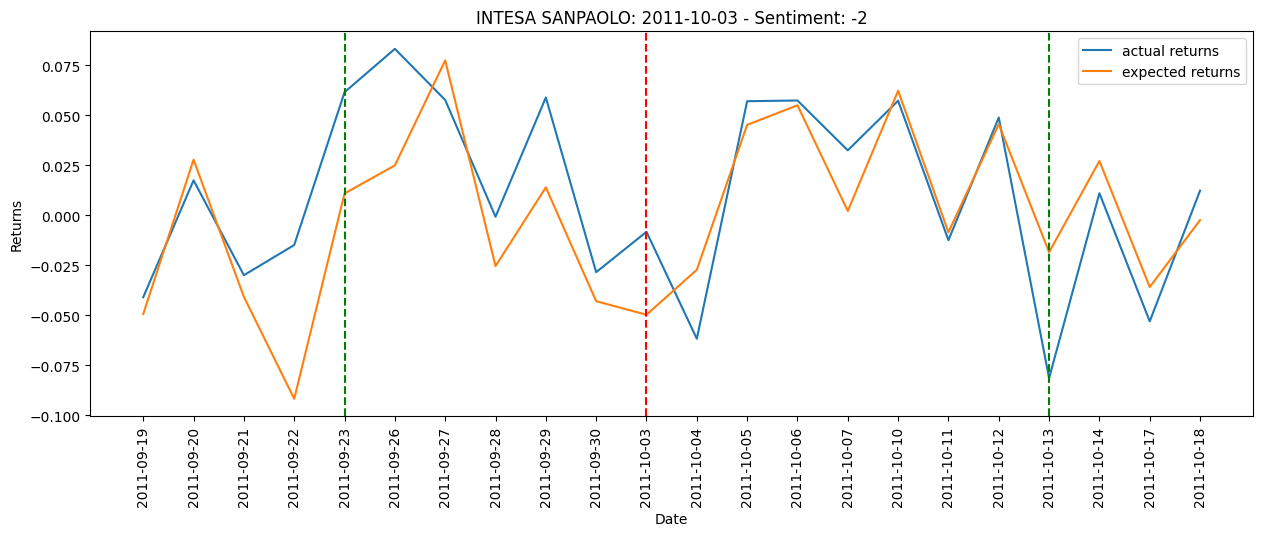

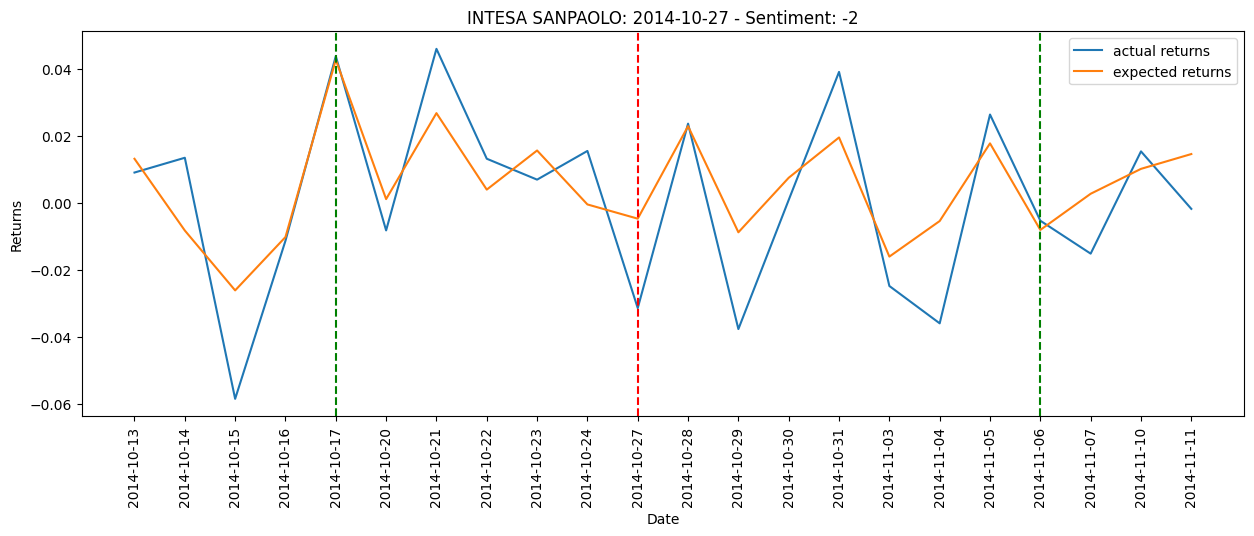

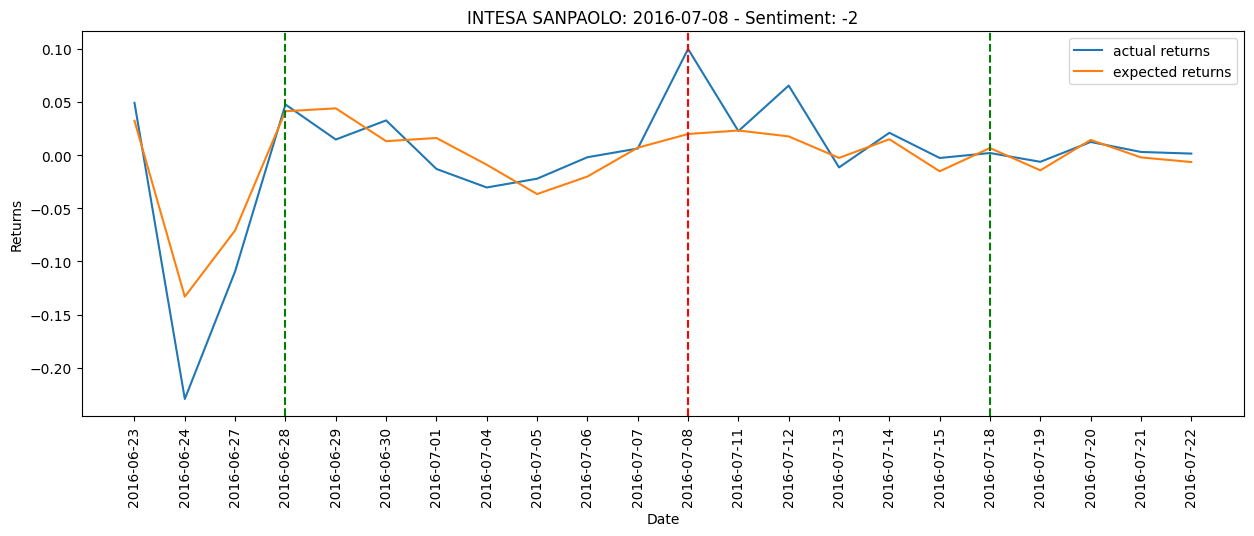

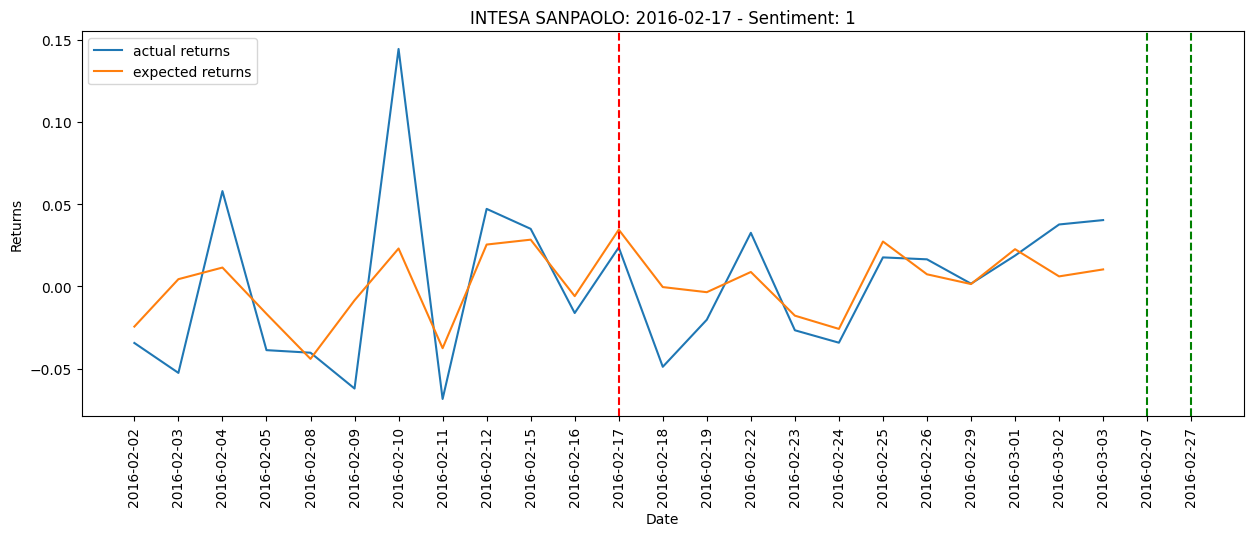

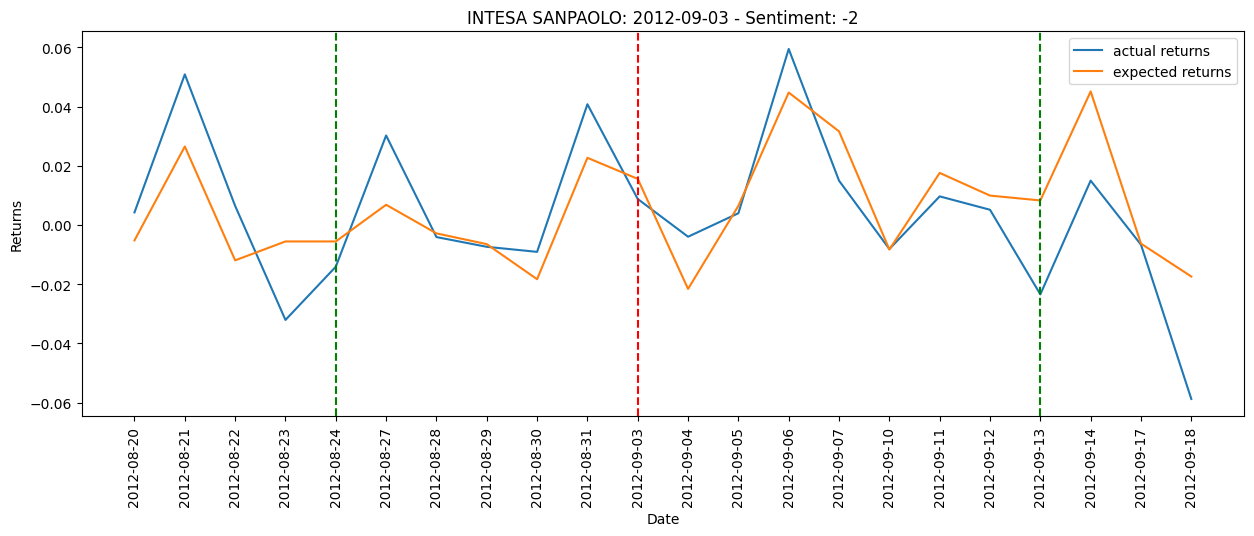

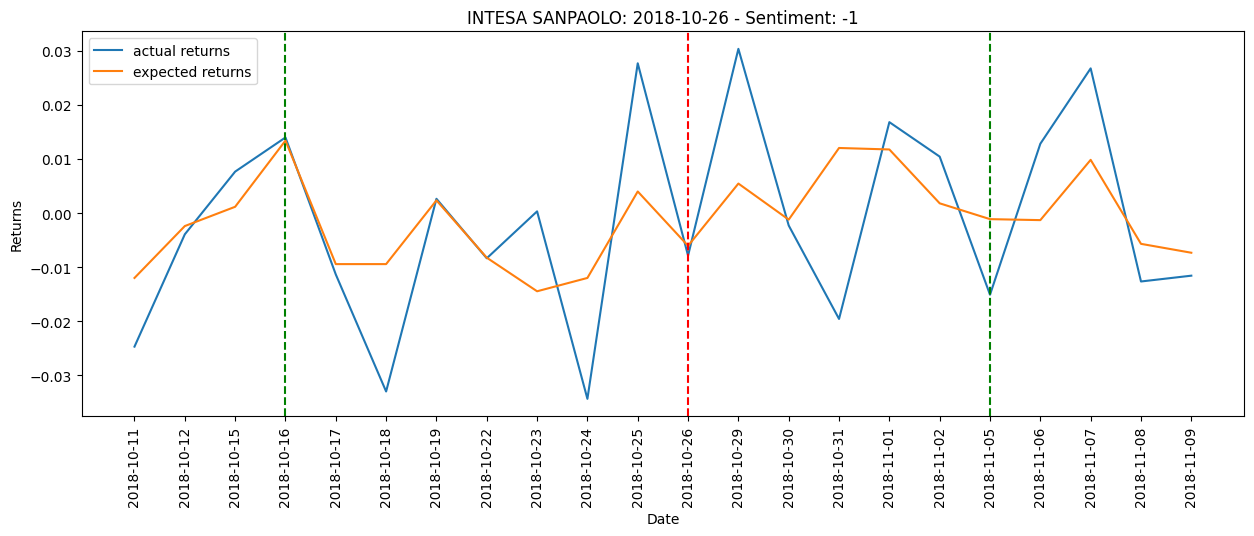

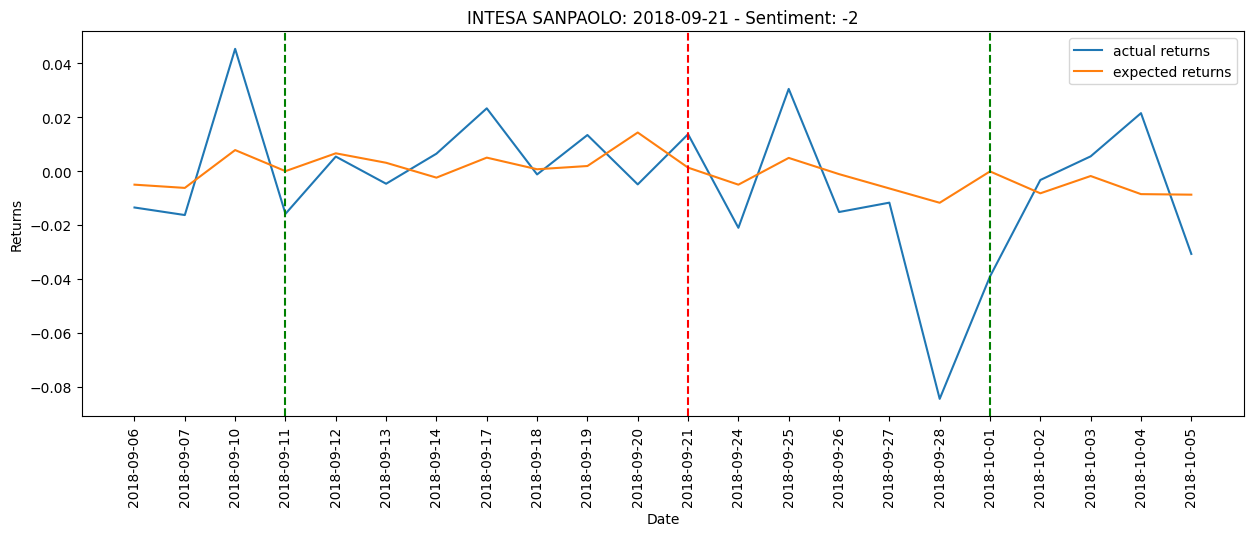

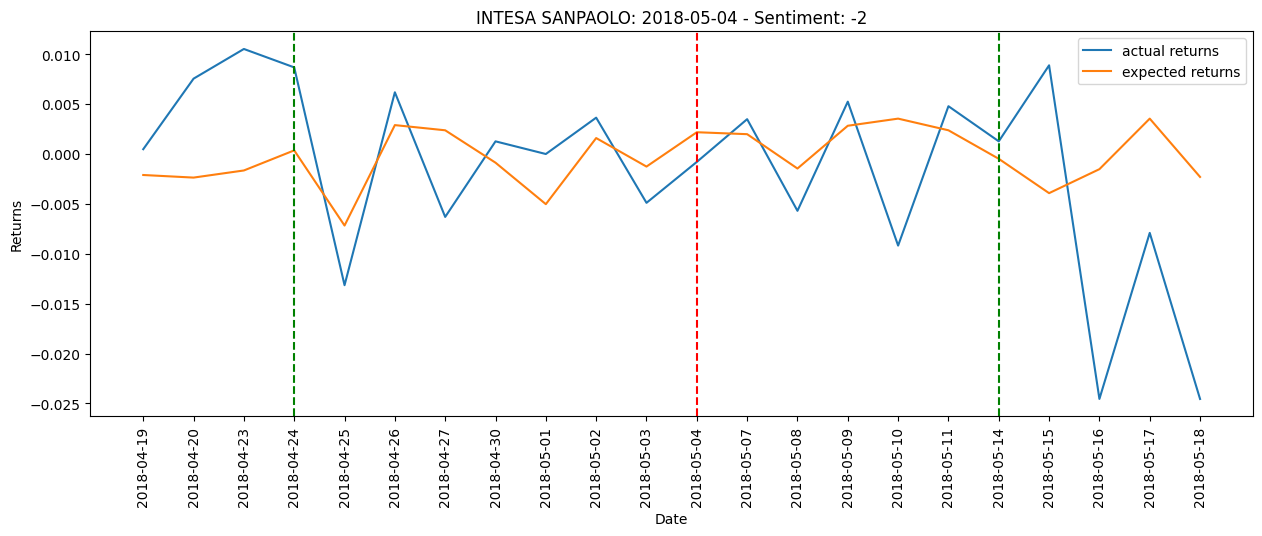

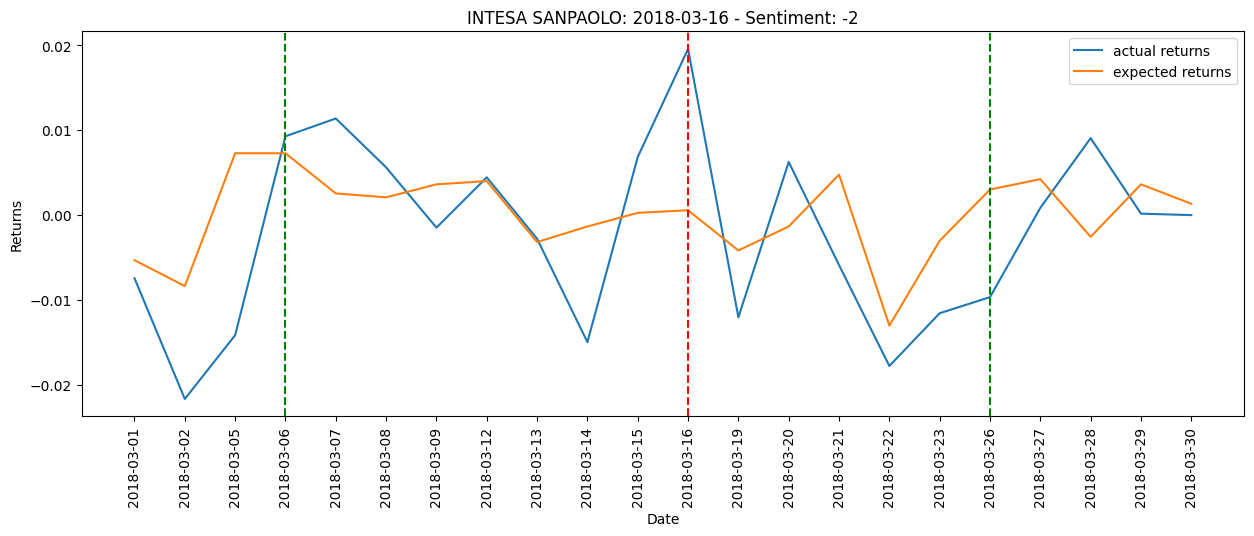

In [43]:
for event in banks_events_flattened['INTESA SANPAOLO']:
    sentiment = df_EU[(df_EU['index'] == 'INTESA SANPAOLO') & (df_EU['date'] == event)]['sentiment'].values[0]
    plt.figure(figsize=(15, 5))
    
    event_date = pd.to_datetime(event, format='%Y-%m-%d')
    event_start = str((event_date - pd.Timedelta(days=15)).date())
    event_end = str((event_date + pd.Timedelta(days=15)).date())
    
    # plot actual returns
    plt.plot(eu_banks_returns.droplevel(0, axis=1)['INTESA SANPAOLO'][event_start:event_end:], label='actual returns')
    
    # plot expected returns CAPM
    alpha_hat, beta_hat = compute_CAPM_coefficients(eu_banks_returns.droplevel(0, axis=1), eu_3fact, 'INTESA SANPAOLO', event_date, 250)
    market_returns = eu_3fact.loc[event_start:event_end, 'Mkt-RF'] / 100
    rf_rates = eu_3fact.loc[event_start:event_end, 'RF'] / 100
    expected_returns = alpha_hat + beta_hat * (market_returns - rf_rates)
    plt.plot(expected_returns, label='expected returns')
    
    # plot event date with red dashed line
    plt.axvline(x=str(event_date.date()), color='r', linestyle='--')
    
    # plot green lines to indicate the event window
    before_event = (event_date - pd.Timedelta(days=10)).date()
    after_event = (event_date + pd.Timedelta(days=10)).date()
    plt.axvline(x=str(before_event), color='g', linestyle='--')
    plt.axvline(x=str(after_event), color='g', linestyle='--')
    
    plt.xticks(rotation=90)
    
    plt.title(f'INTESA SANPAOLO: {event_date.date()} - Sentiment: {sentiment}')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()


At the same time another important time series plot is the one of the CARs over time. This plot shows the cumulative impact of the event on the bank. We can see the impact of the event on the bank and how it evolves over time.

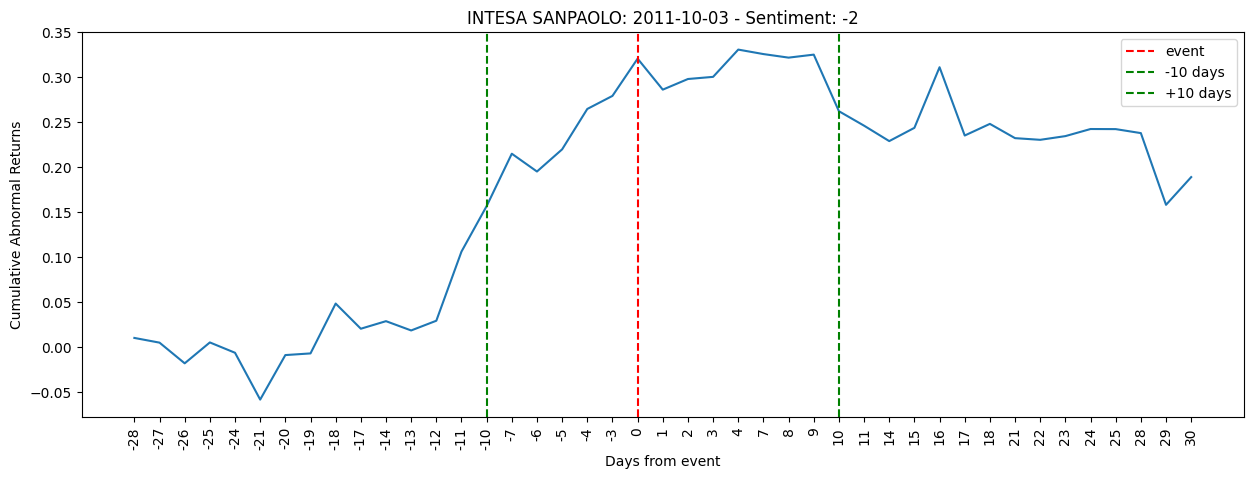

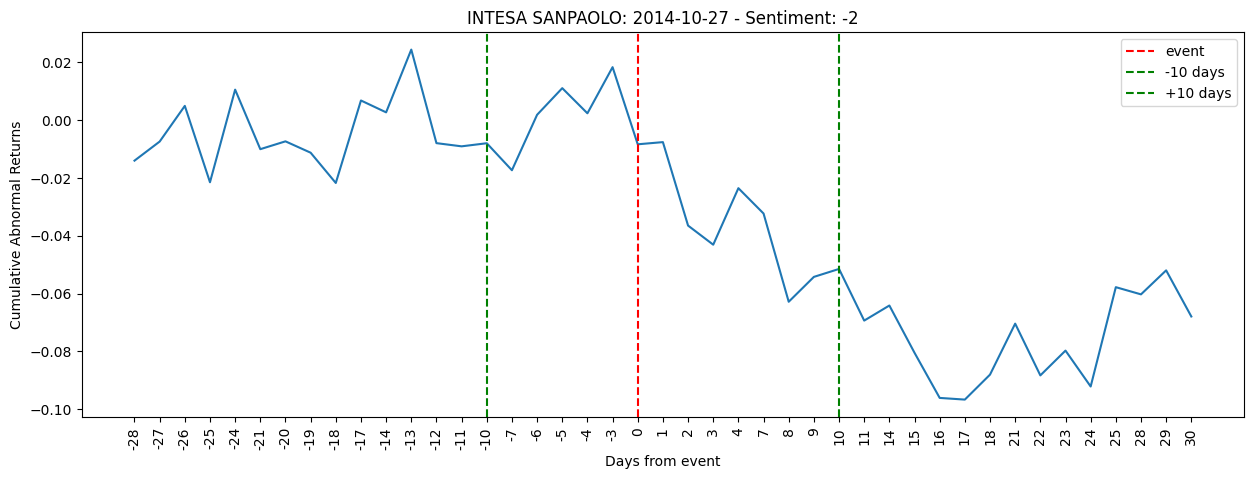

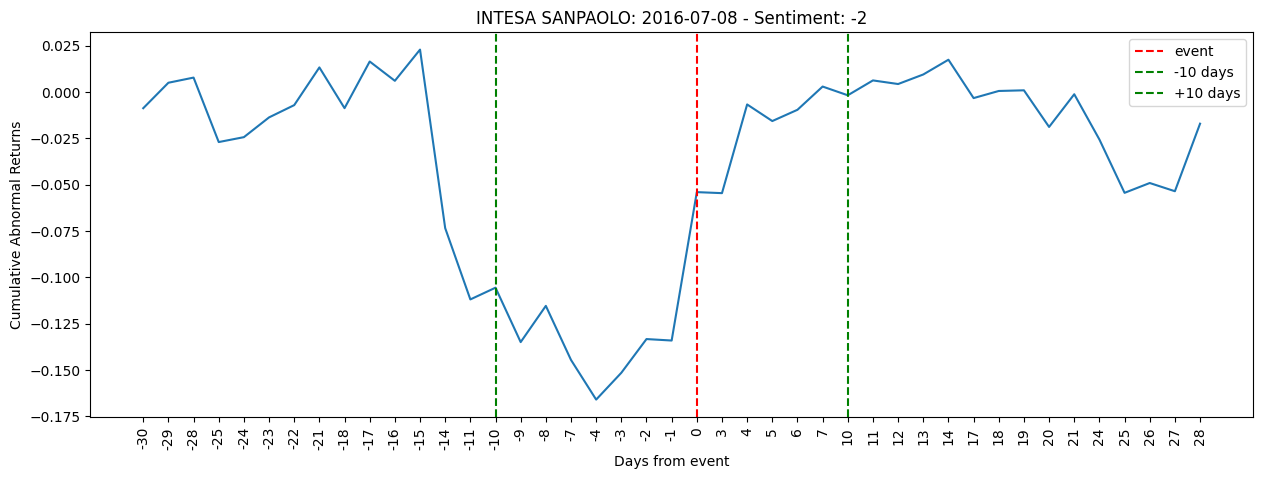

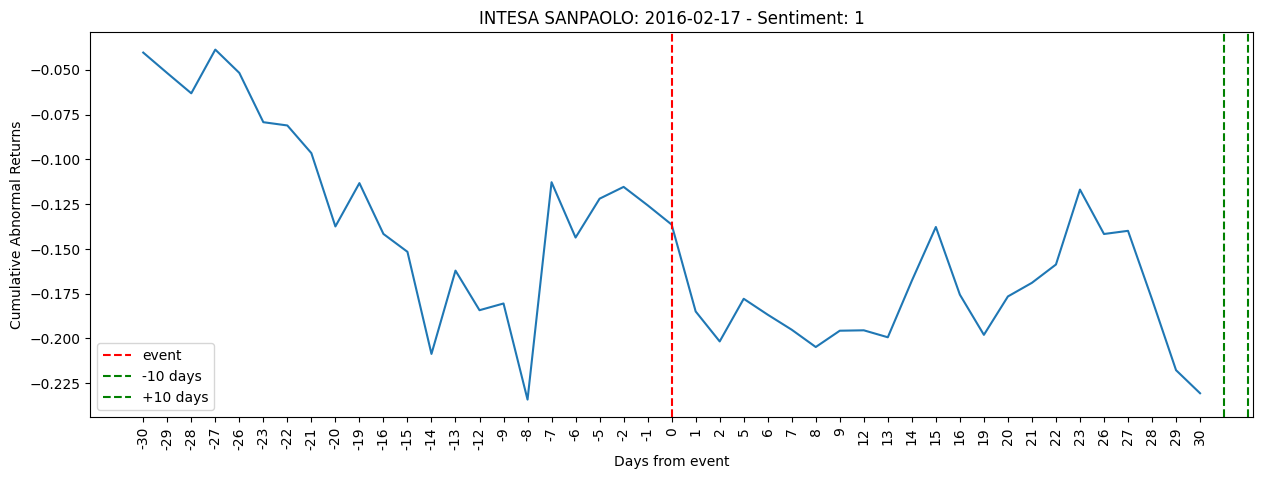

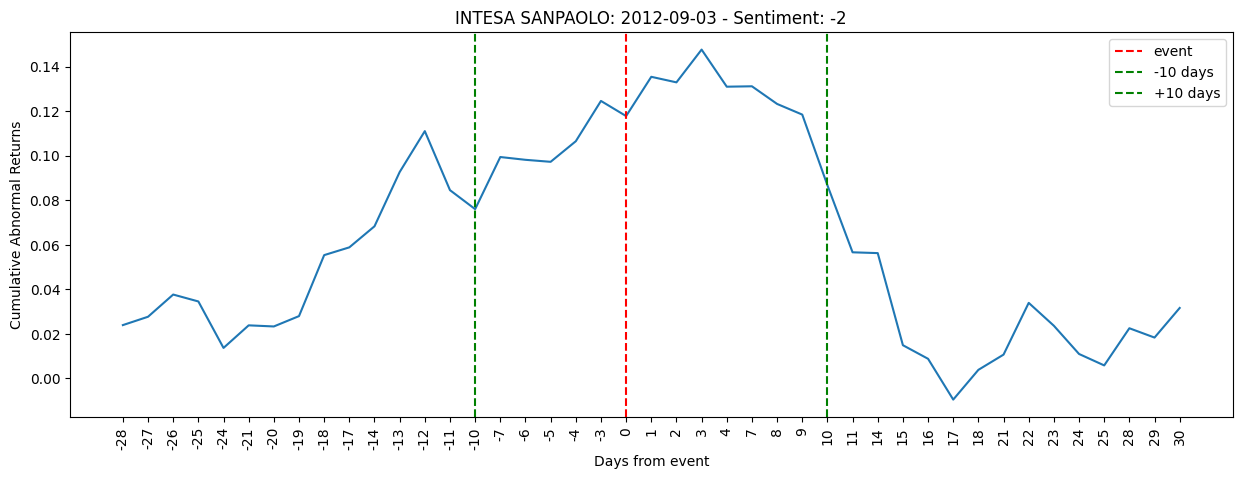

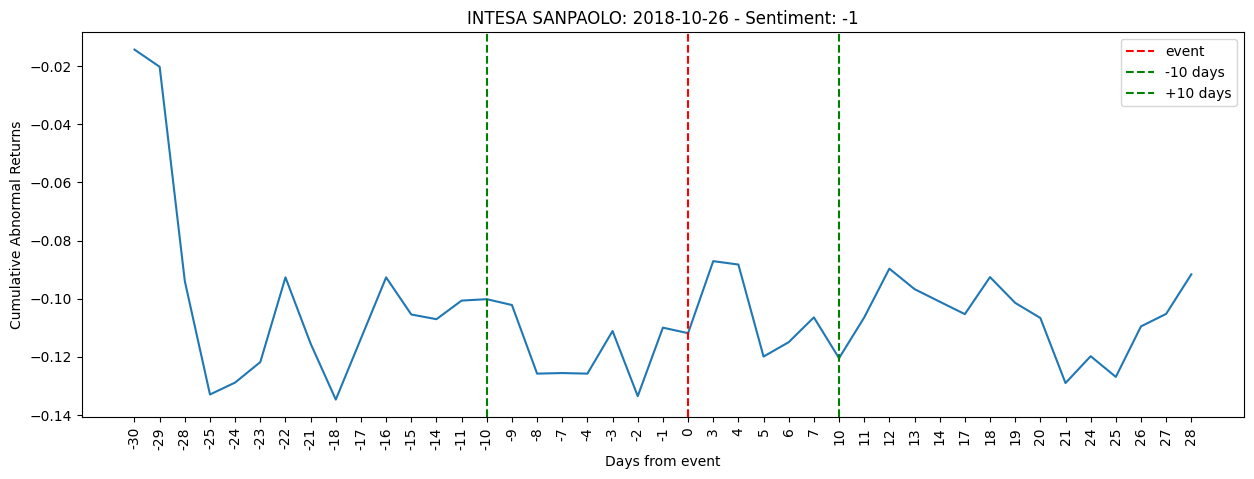

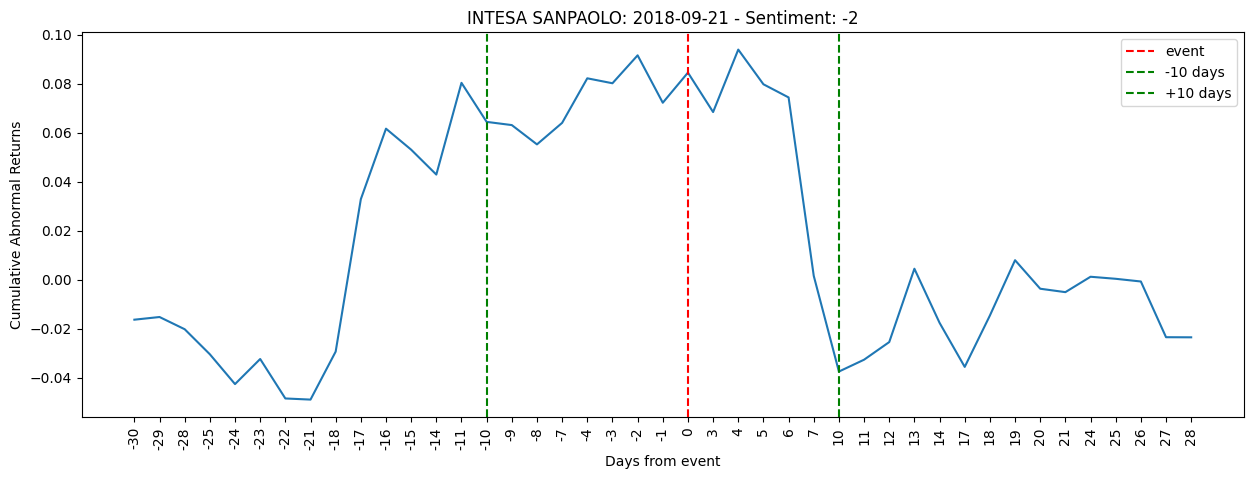

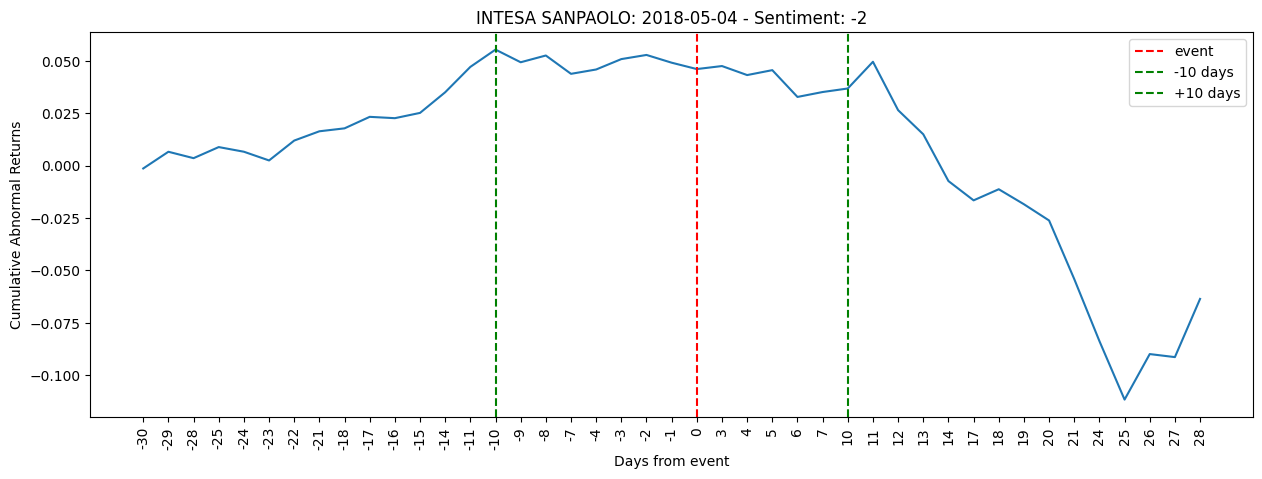

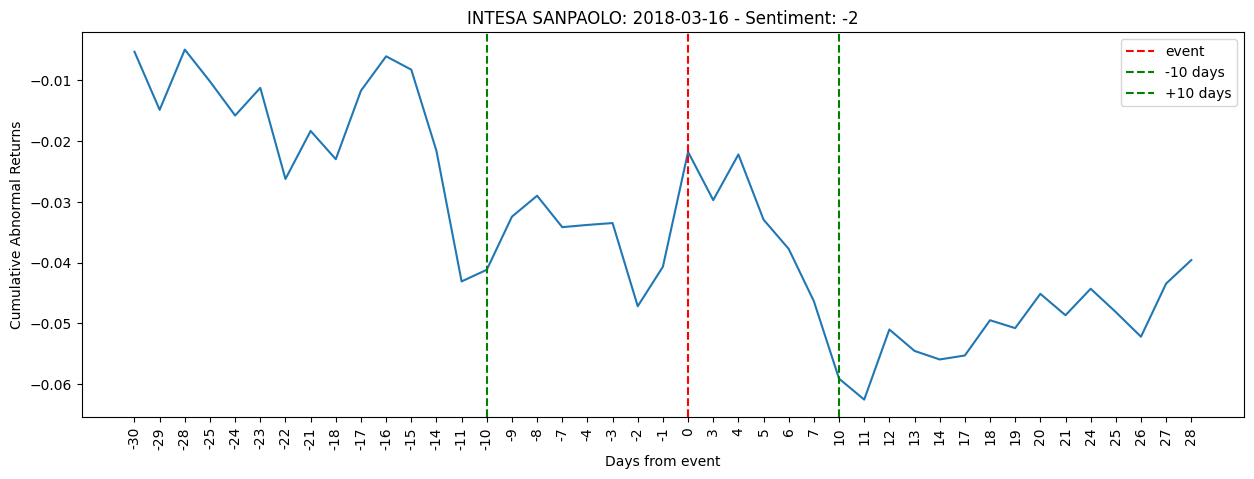

In [44]:
for event in banks_events_flattened['INTESA SANPAOLO']:
    car_res= ab_res_eu['INTESA SANPAOLO'][pd.to_datetime(event)].cumsum()
    # set plot size
    plt.figure(figsize=(15, 5))
    # plot cumulative abnormal returns
    plt.plot(car_res)
    # plot line corresponding to event date
    plt.axvline(x=str(pd.to_datetime(event).date()), color='r', linestyle='--', label='event')
    # plot green lines 10 days before and after the event
    plt.axvline(x=str((pd.to_datetime(event) - pd.Timedelta(days=10)).date()), color='g', linestyle='--', label='-10 days')
    plt.axvline(x=str((pd.to_datetime(event) + pd.Timedelta(days=10)).date()), color='g', linestyle='--', label='+10 days')
    
    # rotate xticks
    plt.xticks(rotation=90)
    
    # change xticks labels calculating the difference between them and event date in days
    xticks = [str((pd.to_datetime(x) - pd.to_datetime(event)).days) for x in car_res.index]
    plt.xticks(range(len(xticks)), xticks)
    
    sentiment = df_EU[(df_EU['index'] == 'INTESA SANPAOLO') & (df_EU['date'] == event)]['sentiment'].values[0]
    plt.title(f'INTESA SANPAOLO: {event} - Sentiment: {sentiment}')
    plt.ylabel('Cumulative Abnormal Returns')
    plt.xlabel('Days from event')
    plt.legend()
    plt.show();


Just looking at the plots, we can see that in proximity of the event date the returns of the stock seem to change based on the sentiment of the news. But this changes often start early or with some delay.

### T-Test

In [45]:
from scipy.stats import ttest_ind

def perform_ttest(df):
    # Splitting the dataset into before and after COP21 using the 'postCOP21' column
    before_COP21 = df[df['postCOP21'] == 0]['CAR']
    after_COP21 = df[df['postCOP21'] == 1]['CAR']
    
    # Performing the t-test
    t_stat, p_value = ttest_ind(before_COP21, after_COP21, equal_var=False)  # Assuming unequal variances
    
    return t_stat, p_value

def visualize_ttest(df):
    # Performing the t-test
    t_stat, p_value = perform_ttest(df)
    
    # Setting up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting the histograms
    sns.histplot(df[df['postCOP21'] == 0]['CAR'], bins=30, color="blue", kde=True, label="Before COP21", ax=ax)
    sns.histplot(df[df['postCOP21'] == 1]['CAR'], bins=30, color="orange", kde=True, label="After COP21", ax=ax)

    # Adding title, labels, and legend
    plt.title('Distribution of CAR Before and After COP21')
    plt.xlabel('CAR')
    plt.ylabel('Density')
    #position the legend on the top left corner
    plt.legend(loc='upper left')

    # Annotating the t-statistic and p-value
    plt.text(0.95, 0.9, f't-statistic: {t_stat:.2f}', horizontalalignment='right', transform=ax.transAxes, color='black')
    plt.text(0.95, 0.85, f'p-value: {p_value:.4f}', horizontalalignment='right', transform=ax.transAxes, color='red')

    plt.tight_layout()
    plt.show()



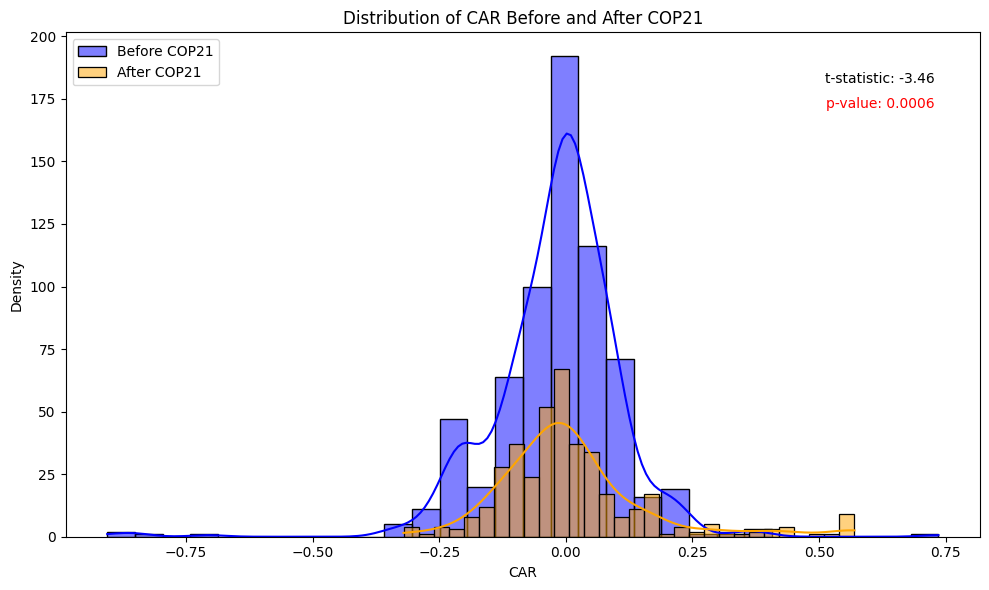

In [46]:
# Call the function with your dataframe
visualize_ttest(df_EU)

The graph suggests that there's a statistically significant change in CAR values after COP21 compared to before COP21. The mean CAR seems to decrease after the event. This means that the events happening after COP21 have a more negative impact on the stock price of the bank.

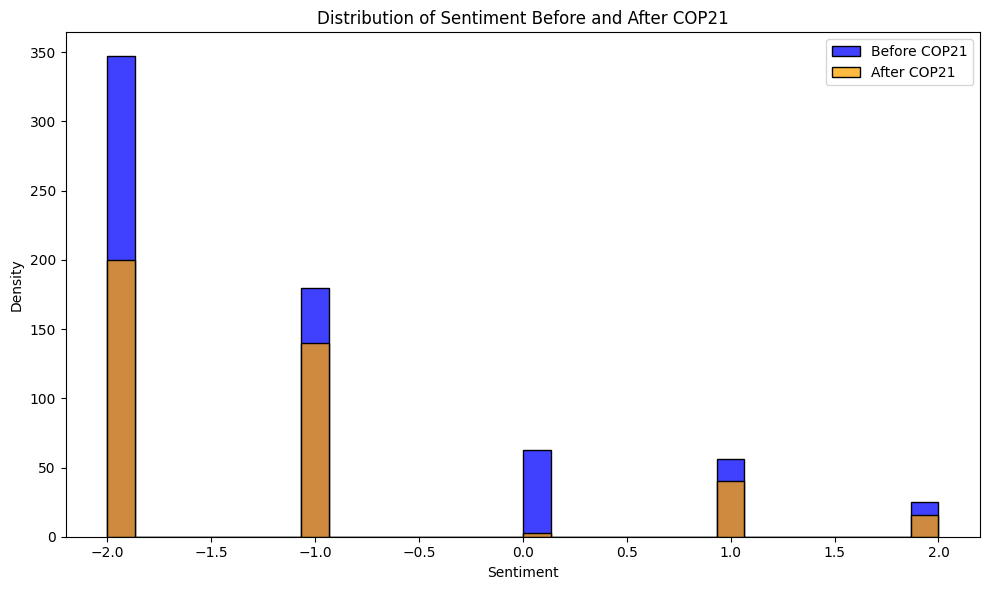

In [47]:
# how is the distribution of sentiment values before and after COP21?
# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histograms
sns.histplot(df_EU[df_EU['postCOP21'] == 0]['sentiment'], bins=30, color="blue", kde=False, label="Before COP21", ax=ax)
sns.histplot(df_EU[df_EU['postCOP21'] == 1]['sentiment'], bins=30, color="orange", kde=False, label="After COP21", ax=ax)

# Adding title, labels, and legend
plt.title('Distribution of Sentiment Before and After COP21')
plt.xlabel('Sentiment') 
plt.ylabel('Density')
#position the legend on the top left corner
plt.legend()

plt.tight_layout()
plt.show()

The previous result is reasonable since the events after COP21 are mostly negative (as we can see from the sentiment analysis).

### ANOVA with sentiment

In [48]:
from scipy.stats import f_oneway

def perform_anova(df):
    # Splitting CAR values based on sentiment groups
    groups = df['sentiment'].unique()
    data_groups = [df['CAR'][df['sentiment'] == group] for group in groups]
    
    # Performing the ANOVA
    f_stat, p_value = f_oneway(*data_groups)
    return f_stat, p_value

def visualize_anova(df):
    # Performing the ANOVA
    f_stat, p_value = perform_anova(df)
    
    # Creating the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='sentiment', y='CAR', data=df, palette="coolwarm")

    # Adding title and labels
    plt.title('Distribution of CAR Across Sentiment Groups')
    plt.xlabel('Sentiment Groups')
    plt.ylabel('CAR')
    
    # Annotating the F-statistic and p-value
    plt.text(0.95, df['CAR'].max() - 0.05, f'F-statistic: {f_stat:.2f}', horizontalalignment='right', transform=plt.gca().transAxes, color='black')
    plt.text(0.95, df['CAR'].max(), f'p-value: {p_value:.4f}', horizontalalignment='right', transform=plt.gca().transAxes, color='red')

    plt.tight_layout()
    plt.show()

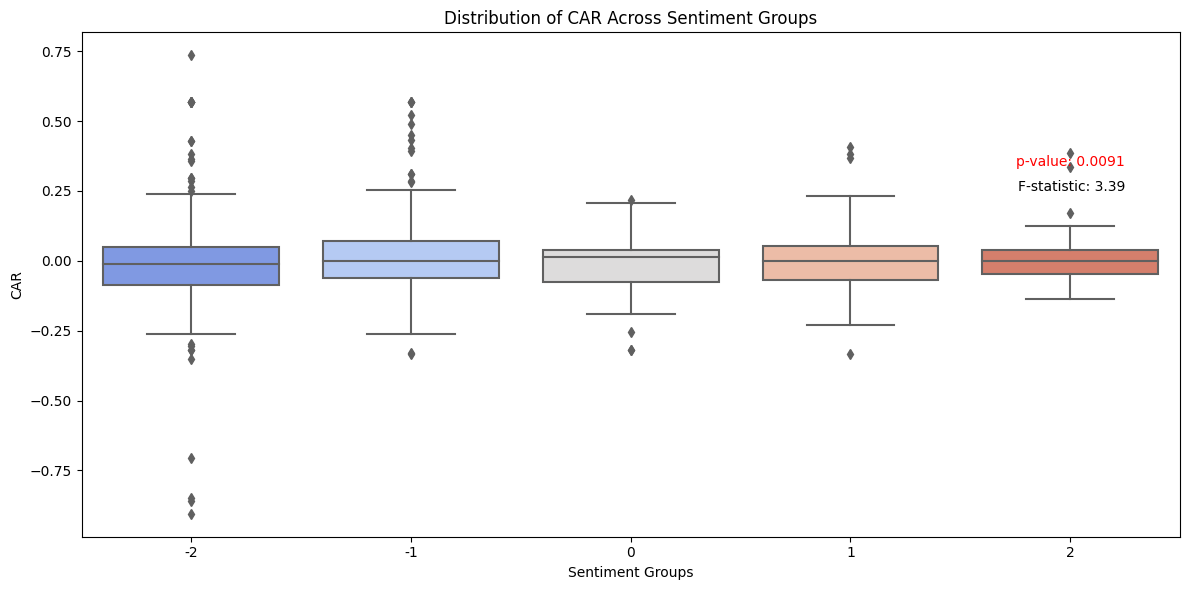

In [49]:
# Call the function with your dataframe
visualize_anova(df_EU)

The F-statistic value of 3.39 suggests that there's a statistically significant difference in the means of CAR values across the sentiment groups.
The different distributions across sentiment groups indicate that the market reaction (as measured by CAR) varies based on sentiment. This could mean that news or events with different sentiment scores influence market returns differently.

However is important to notice that the CAR mean is always around 0, so the impact of the events on the stock price is not so big.

### Linear Regression

Finally, to test wether news sentiment score affects the abnormal returns of a stock, we decided to run an ols regression on CAR using sentiment score as input. In addition, we decided to use excess market returns, prominence and pre/post-COP21 as controlling factors, in order to consider only variations due to news and exclude other factors that might possibly affect CAR. 

Finally, we decided to decided to split our data based on sentiment score (negative, neutral and positive news) and obviously by market (EU and US).


The regression is the following:

$$
CAR_i = \alpha + \beta_1 sentiment_i + \beta_2 (Mkt-RF_i) + \beta_3 prominence_i + \beta_4 postCOP21_i + \beta_5 sentiment_prominence_i + \epsilon_i
$$

Where:

- $CAR_i$ is the CAR of the bank $i$
- $sentiment_i$ is the sentiment score of the news of the bank $i$
- $Mkt-RF_i$ is the excess market return of the bank $i$
- $prominence_i$ is the prominence of the news of the bank $i$
- $postCOP21_i$ is a dummy variable which is 1 if the news is after COP21 and 0 otherwise
- $sentiment-prominence_i$ is the interaction between sentiment and prominence of the news of the bank $i$

We consider 3 and 4 as high prominence and the remaining values as low prominence

In [50]:
# split data by positivve, neutral and negative sentiment
df_pos = df_EU[df_EU['sentiment'] > 0]
df_neg = df_EU[df_EU['sentiment'] < 0]
df_neut = df_EU[df_EU['sentiment'] == 0]

In [51]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def regression_analysis(df_sentiment, sentiment_type, time_windows, returns_data, factor_data, events_data, mkt_daily_ret, estimation_window_size=250):
    """
    Perform regression analysis on sentiment-filtered data and visualize the results.

    :param df_sentiment: The sentiment-filtered dataframe
    :param sentiment_type: String indicating the sentiment type ('positive', 'negative', 'neutral')
    :param time_windows: List of time windows to consider for CAR computation
    :param returns_data: Returns data
    :param factor_data: Factor data
    :param events_data: Events data
    :param estimation_window_size: Size of the estimation window. Default is 250
    """
    
    # Initial regression analysis
    X = df_sentiment[['sentiment', 'Mkt-RF', 'prominence', 'postCOP21', 'sentiment_prominence']]
    y = df_sentiment['CAR']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Initial regression results for {sentiment_type} sentiment:\n")
    print(model.summary())
    print("\n" + "="*50 + "\n")

    # Compute CARs for different time windows and store results
    res = {}
    for window in time_windows:
        car_values, _ = compute_CAR(returns_data, factor_data, events_data, estimation_window_size=estimation_window_size, event_window=window)
        df = create_df_eu(car_values, _, mkt_daily_ret)

        # Filter based on sentiment type
        if sentiment_type == 'positive':
            df_filtered = df[df['sentiment'] > 0]
        elif sentiment_type == 'negative':
            df_filtered = df[df['sentiment'] < 0]
        elif sentiment_type == 'neutral':
            df_filtered = df[df['sentiment'] == 0]
        else:
            raise ValueError("Invalid sentiment_type provided")

        X = df_filtered[['sentiment', 'Mkt-RF', 'prominence', 'postCOP21', 'sentiment_prominence']]
        y = df_filtered['CAR']
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        
        # Take coefficient of sentiment and p-value
        res[window] = [model.params[1], model.pvalues[1]]

    plt.figure(figsize=(15, 5))

    # Plot bars based on significance
    plt.bar(res.keys(), [x[0] for x in res.values()], color=['green' if x[1] < 0.05 else 'red' for x in res.values()])

    # Add horizontal line at y=0
    plt.axhline(y=0, color='black', linestyle='--')

    # Manually create patches for the legend
    legend_elements = [Patch(facecolor='green', edgecolor='green', label='Significant'),
                    Patch(facecolor='red', edgecolor='red', label='Not significant')]

    # Add the legend to the plot
    plt.legend(handles=legend_elements)

    plt.xticks(time_windows)
    plt.xlabel('Time window')
    plt.ylabel('Coefficient of sentiment')
    plt.title(f'Coefficient of sentiment for different time windows - {sentiment_type.capitalize()} sentiment')
    plt.show()

# Now, you can call the function for different sentiment types:
time_windows = [5, 10, 15, 20, 25, 30]

Positive sentiment

Initial regression results for positive sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.023
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.407
Time:                        09:53:02   Log-Likelihood:                 111.13
No. Observations:                 137   AIC:                            -210.3
Df Residuals:                     131   BIC:                            -192.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

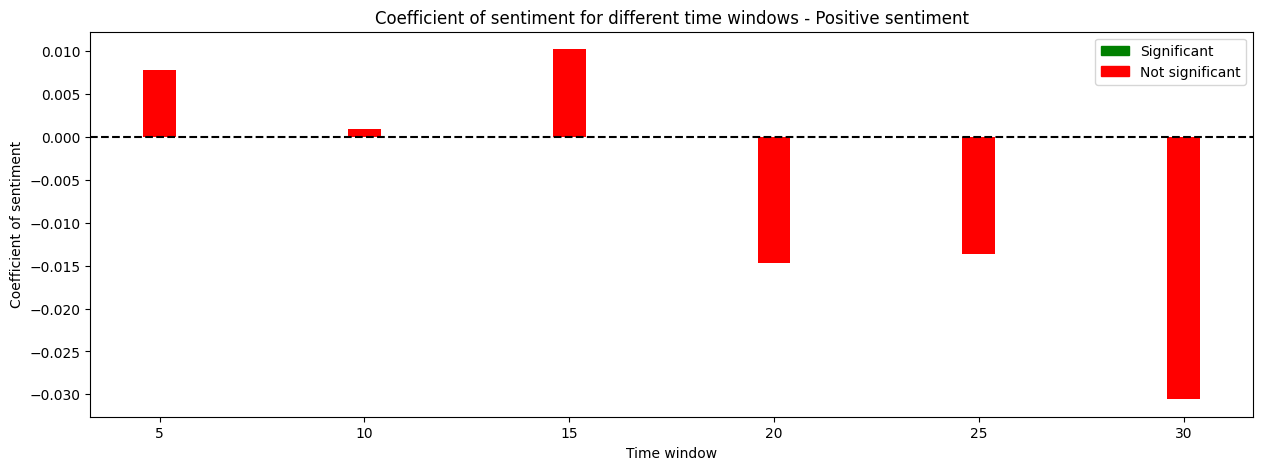

In [52]:
regression_analysis(df_pos, 'positive', time_windows, eu_banks_returns, eu_3fact, banks_events_flattened, mkt_daily_ret_EU)

Negative sentiment

Initial regression results for negative sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.138
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.34e-05
Time:                        09:53:13   Log-Likelihood:                 455.93
No. Observations:                 867   AIC:                            -899.9
Df Residuals:                     861   BIC:                            -871.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

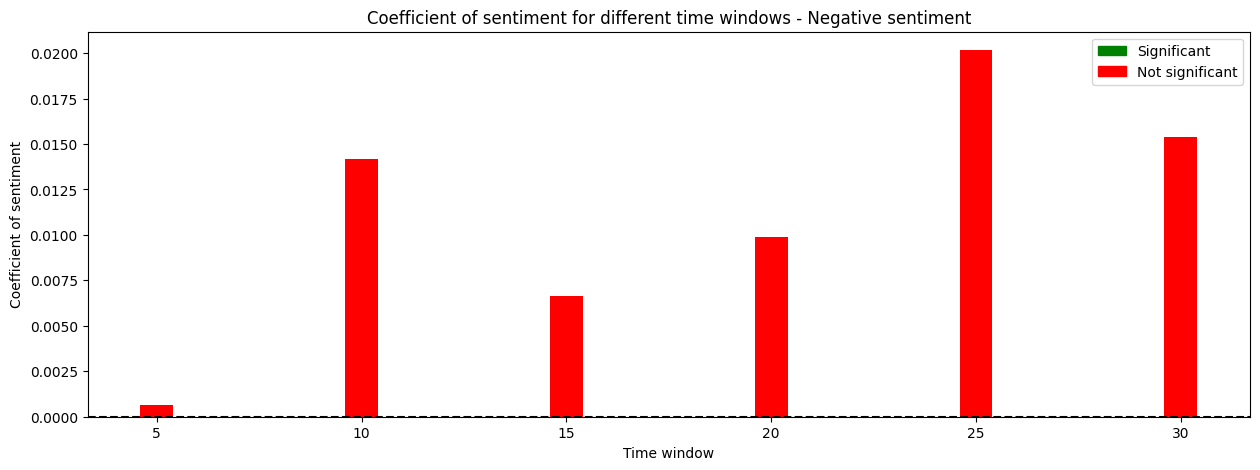

In [53]:

regression_analysis(df_neg, 'negative', time_windows, eu_banks_returns, eu_3fact, banks_events_flattened, mkt_daily_ret_EU)


Neutral sentiment

Initial regression results for neutral sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     5.235
Date:                Fri, 27 Oct 2023   Prob (F-statistic):            0.00276
Time:                        09:53:24   Log-Likelihood:                 68.073
No. Observations:                  66   AIC:                            -128.1
Df Residuals:                      62   BIC:                            -119.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

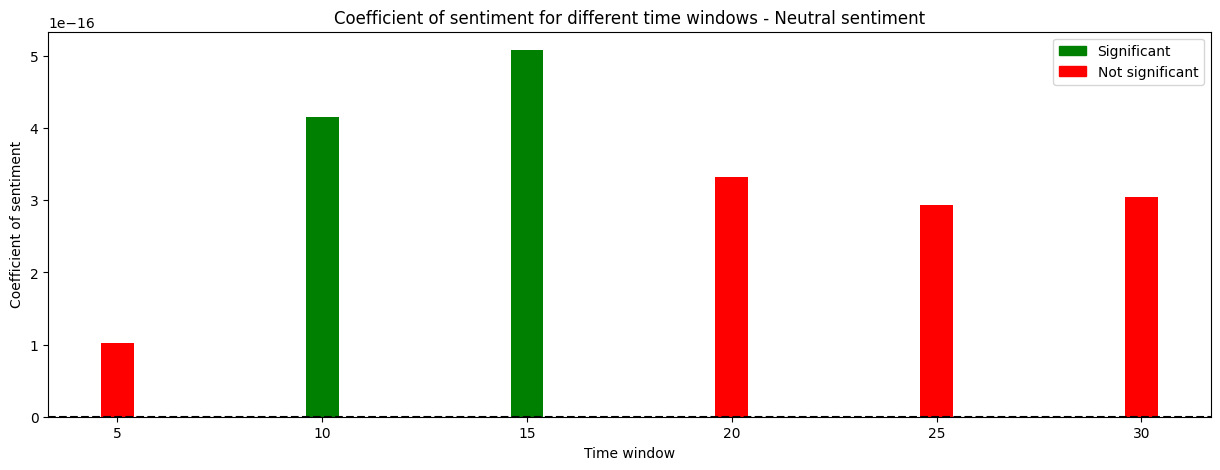

In [54]:
regression_analysis(df_neut, 'neutral', time_windows, eu_banks_returns, eu_3fact, banks_events_flattened, mkt_daily_ret_EU)

Looking at the plots, we can see that the coefficient of sentiment scores is almost always 0. The only exception is for neutral news where we obtained coefficients statistically different from zero, even if these are really close to zero.

## US market

### Time Series Plot

Here we plot just the results for MASTERCARD

Actual return vs Expected returns (CAPM)

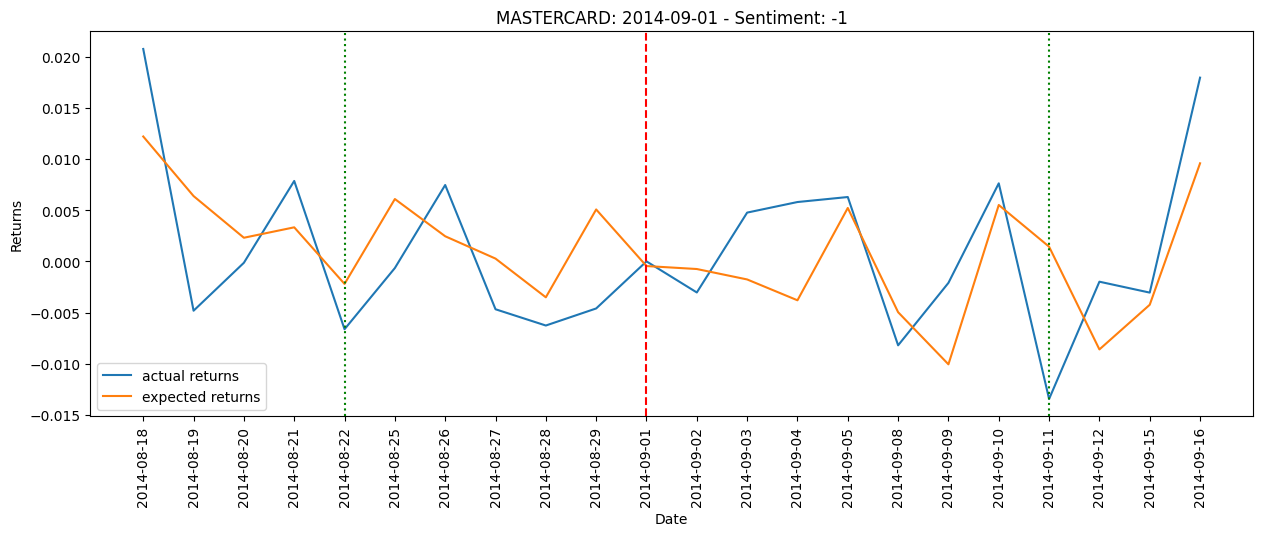

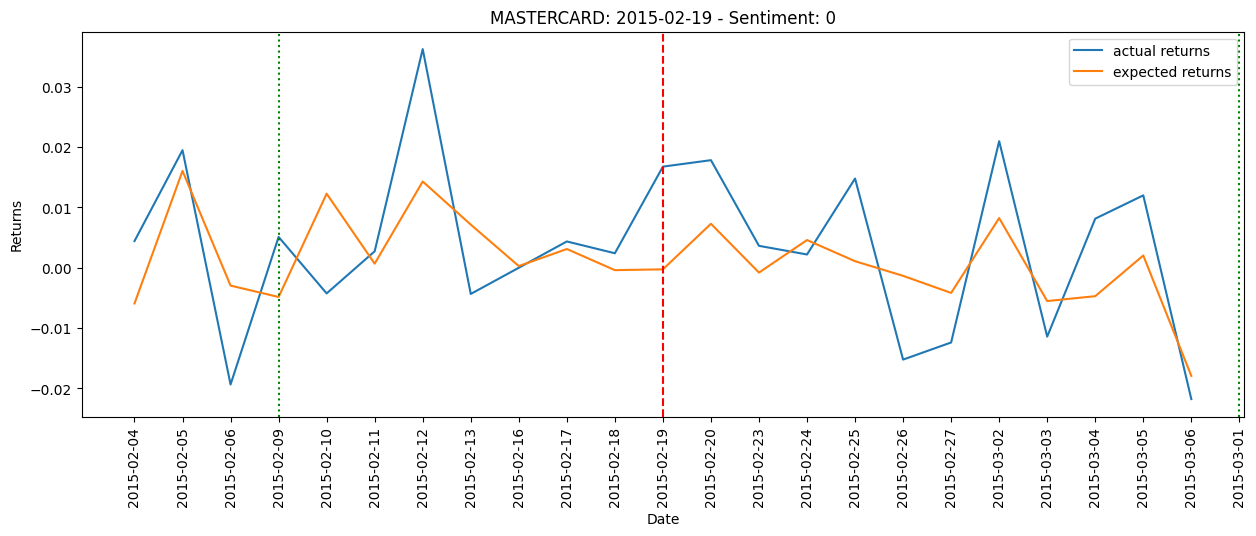

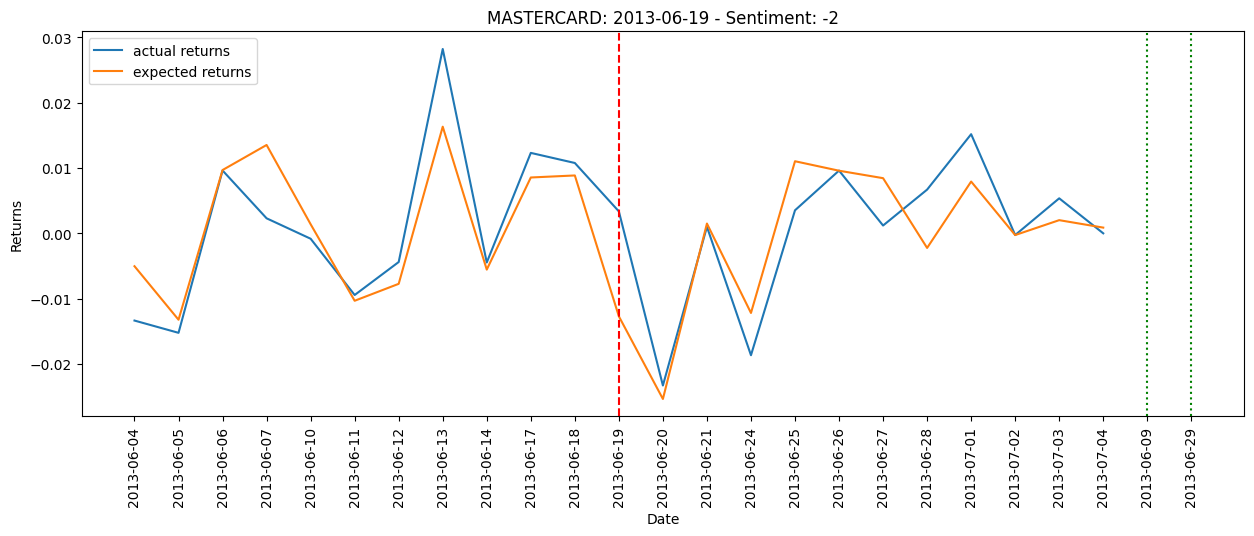

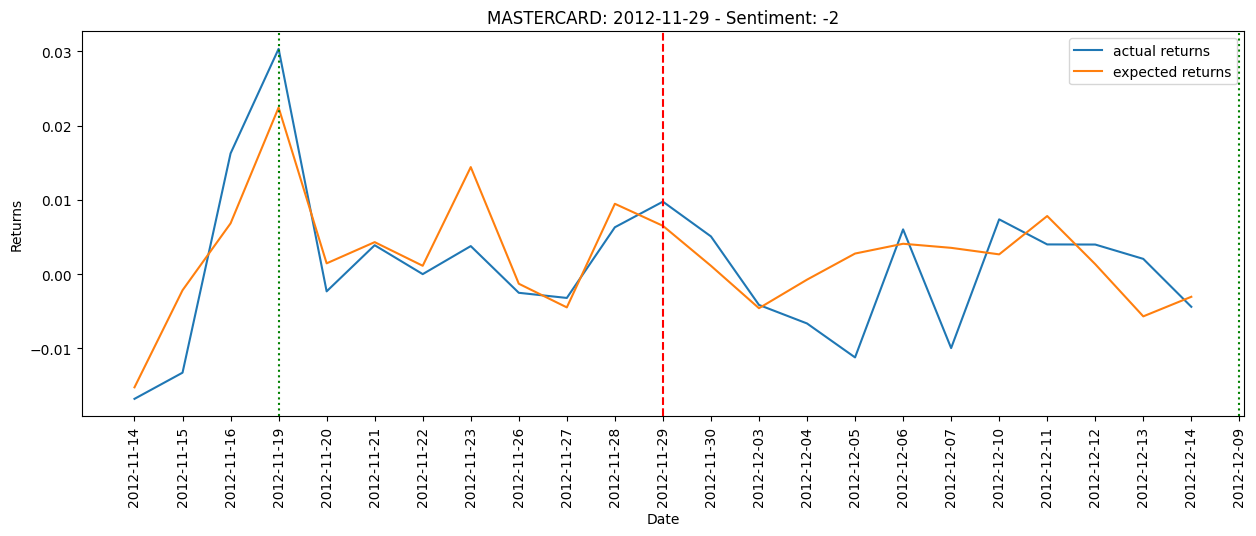

In [55]:
for event in banks_events_flattened['MASTERCARD']:
    sentiment = df_US[(df_US['index'] == 'MASTERCARD') & (df_US['date'] == event)]['sentiment'].values[0]    
    plt.figure(figsize=(15, 5))
    
    event_start = str((pd.to_datetime(event, format='%Y-%m-%d') - pd.Timedelta(days=15)).date())
    event_end = str((pd.to_datetime(event, format='%Y-%m-%d') + pd.Timedelta(days=15)).date())
    
    # plot actual returns
    plt.plot(us_banks_returns.droplevel(0, axis=1)['MASTERCARD'][event_start:event_end:], label = 'actual returns')
    
    
    # plot expected returns CAPM
    event = pd.to_datetime(event)
    event = event.strftime('%Y-%m-%d')
    event = pd.to_datetime(event, format='%Y-%m-%d')
    
    alpha_hat, beta_hat = compute_CAPM_coefficients(us_banks_returns.droplevel(0, axis=1), us_3fact, 'MASTERCARD', event, 250)
    market_returns = us_3fact.loc[event_start:event_end, 'Mkt-RF'] / 100
    rf_rates = us_3fact.loc[event_start:event_end, 'RF'] / 100
    expected_returns = alpha_hat + beta_hat * (market_returns - rf_rates)
    plt.plot(expected_returns, label = 'expected returns')
    
    # plot event date with red dashed line
    plt.axvline(x=str(event.date()), color='r', linestyle='--')

    # plot green lines at +10 and -10 days from the event
    ten_days_before = (event - pd.Timedelta(days=10)).strftime('%Y-%m-%d')
    ten_days_after = (event + pd.Timedelta(days=10)).strftime('%Y-%m-%d')
    plt.axvline(x=ten_days_before, color='g', linestyle=':')
    plt.axvline(x=ten_days_after, color='g', linestyle=':')
    
    plt.xticks(rotation=90)    
    plt.title(f'MASTERCARD: {event.date()} - Sentiment: {sentiment}')

    plt.xlabel('Date')
    plt.ylabel('Returns')

    plt.legend()
    plt.show()


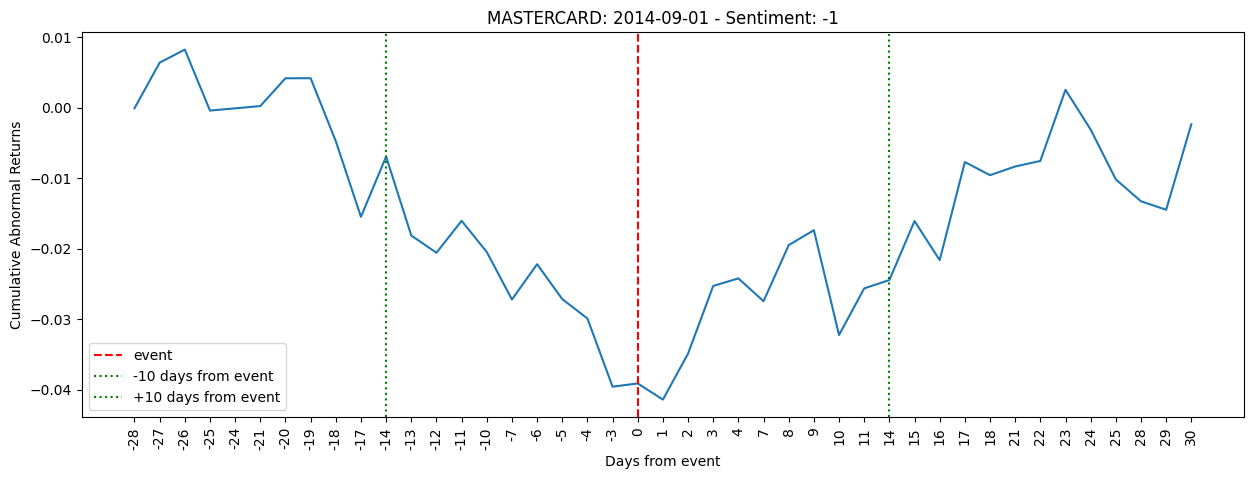

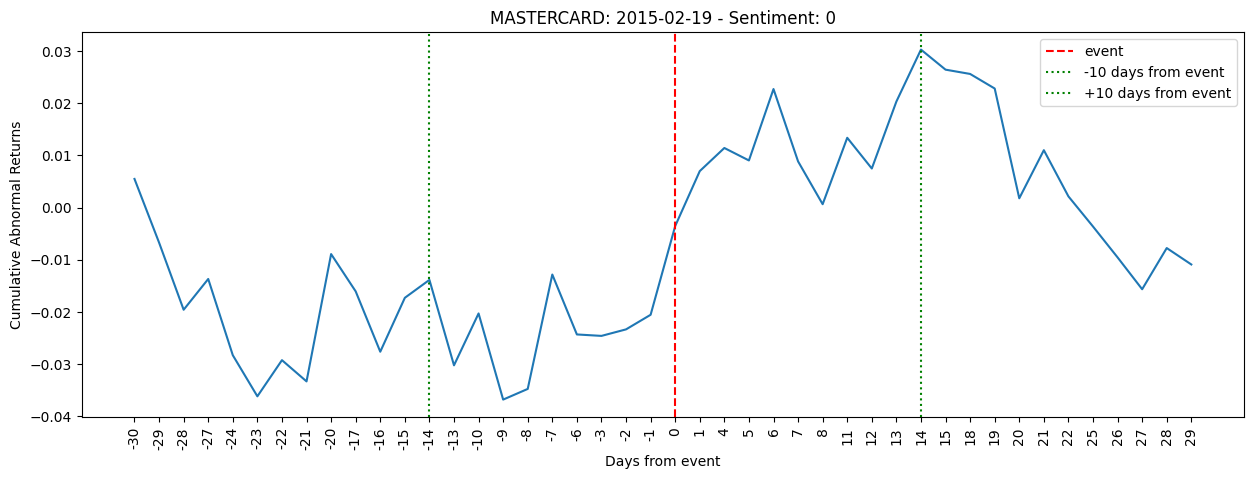

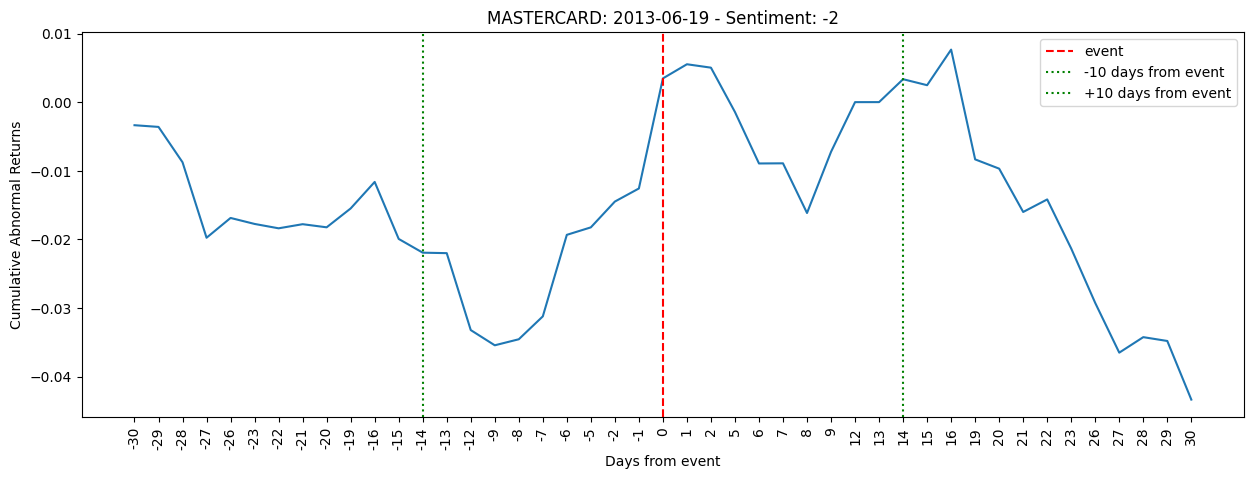

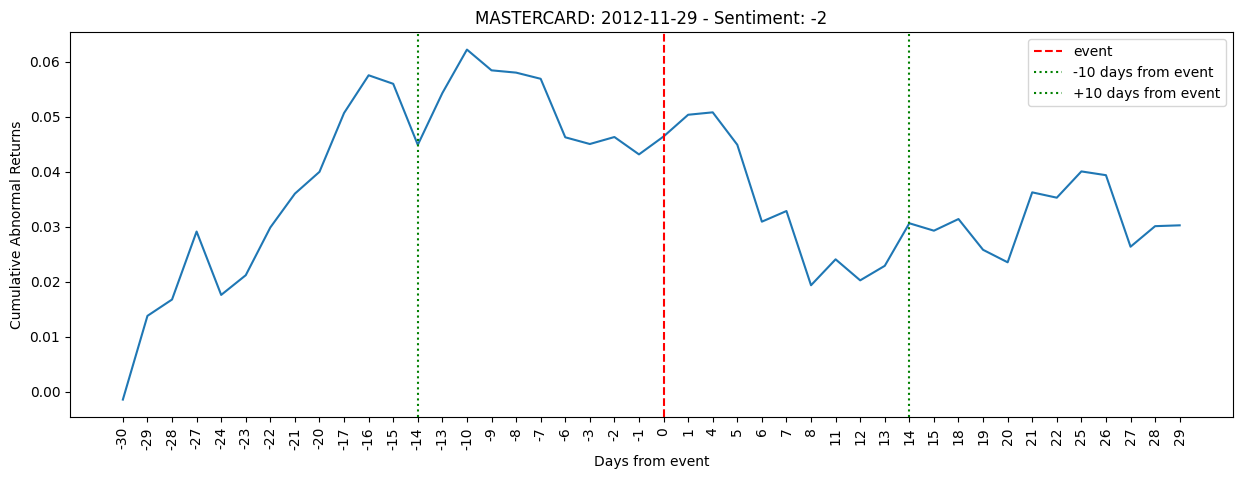

In [56]:
for event in banks_events_flattened['MASTERCARD']:
    car_res= ab_res_us['MASTERCARD'][pd.to_datetime(event)].cumsum()
    # set plot size
    plt.figure(figsize=(15, 5))
    # plot cumulative abnormal returns
    plt.plot(car_res)
    # plot line corresponding to event date
    plt.axvline(x=str(pd.to_datetime(event).date()), color='r', linestyle='--', label = 'event')
    
    # calculate indices for -10 and +10 days from event for plotting
    ten_days_before_idx = (car_res.index.get_loc(event) - 10)
    ten_days_after_idx = (car_res.index.get_loc(event) + 10)
    
    # plot green lines at -10 and +10 days from the event
    plt.axvline(x=ten_days_before_idx, color='g', linestyle=':', label='-10 days from event')
    plt.axvline(x=ten_days_after_idx, color='g', linestyle=':', label='+10 days from event')

    # rotate xticks
    plt.xticks(rotation=90)
    
    # change xticks labels calculating the difference between them and event date in days
    xticks = [str((pd.to_datetime(x) - pd.to_datetime(event)).days) for x in car_res.index]
    plt.xticks(range(len(xticks)), xticks)
    
    sentiment = df_US[(df_US['index'] == 'MASTERCARD') & (df_US['date'] == event)]['sentiment'].values[0]
    plt.title(f'MASTERCARD: {event} - Sentiment: {sentiment}')
    plt.ylabel('Cumulative Abnormal Returns')
    plt.xlabel('Days from event')
    plt.legend()
    plt.show();


### T-Test

In [57]:
df_US.postCOP21.value_counts()

0    330
1      5
Name: postCOP21, dtype: int64

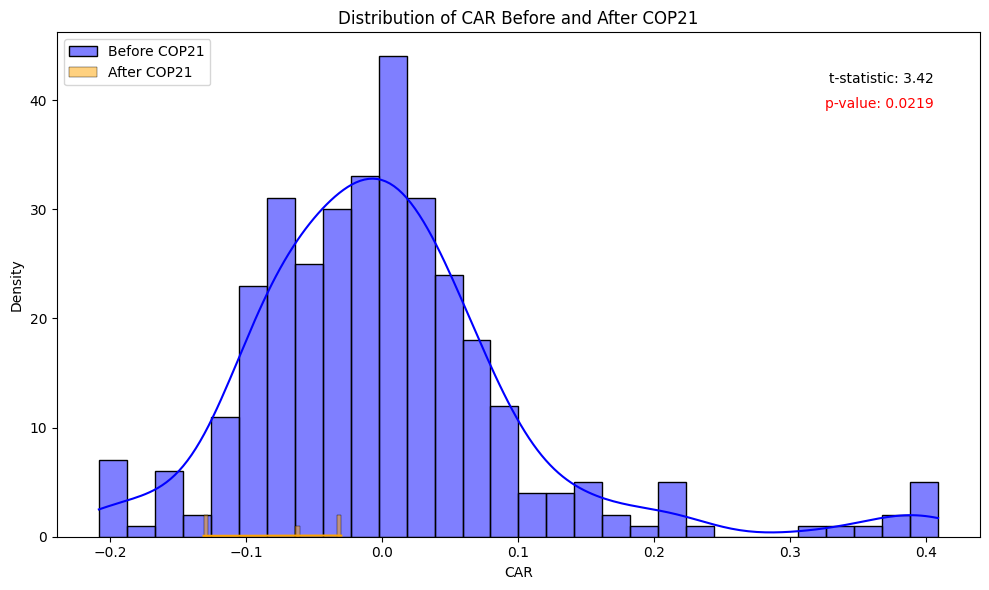

In [58]:
# Call the function with your dataframe
visualize_ttest(df_US)

### ANOVA with sentiment

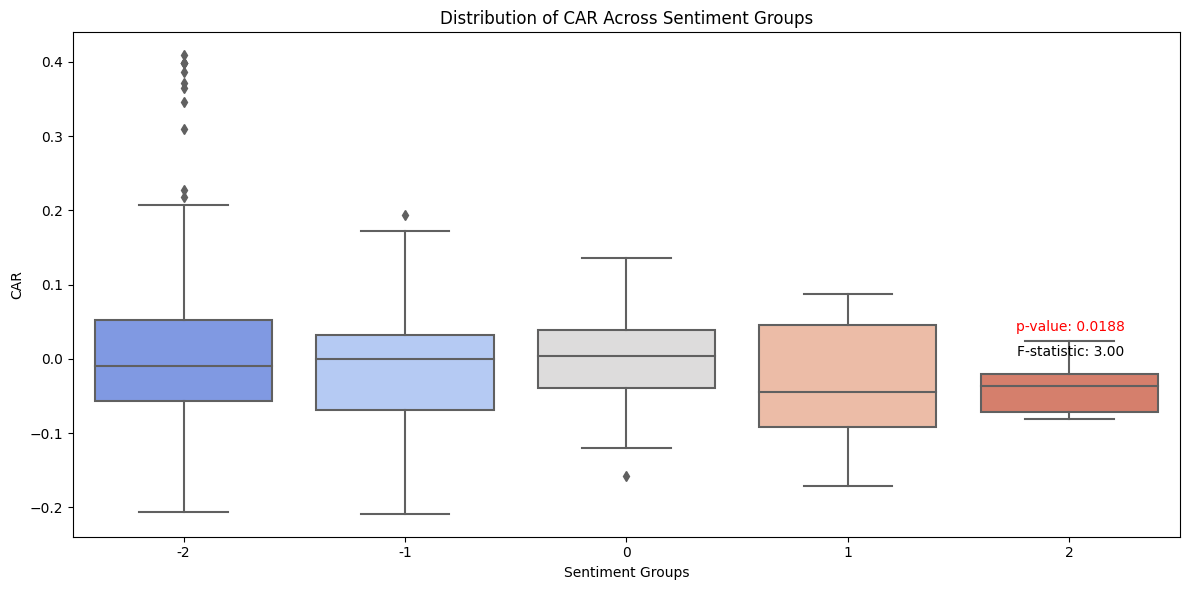

In [59]:
visualize_anova(df_US)

### Linear Regression

In [60]:
# split data by positivve, neutral and negative sentiment
df_pos = df_US[df_US['sentiment'] > 0]
df_neg = df_US[df_US['sentiment'] < 0]
df_neut = df_US[df_US['sentiment'] == 0]

Positive sentiment

Initial regression results for positive sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.4322
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.731
Time:                        09:53:37   Log-Likelihood:                 39.970
No. Observations:                  34   AIC:                            -71.94
Df Residuals:                      30   BIC:                            -65.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

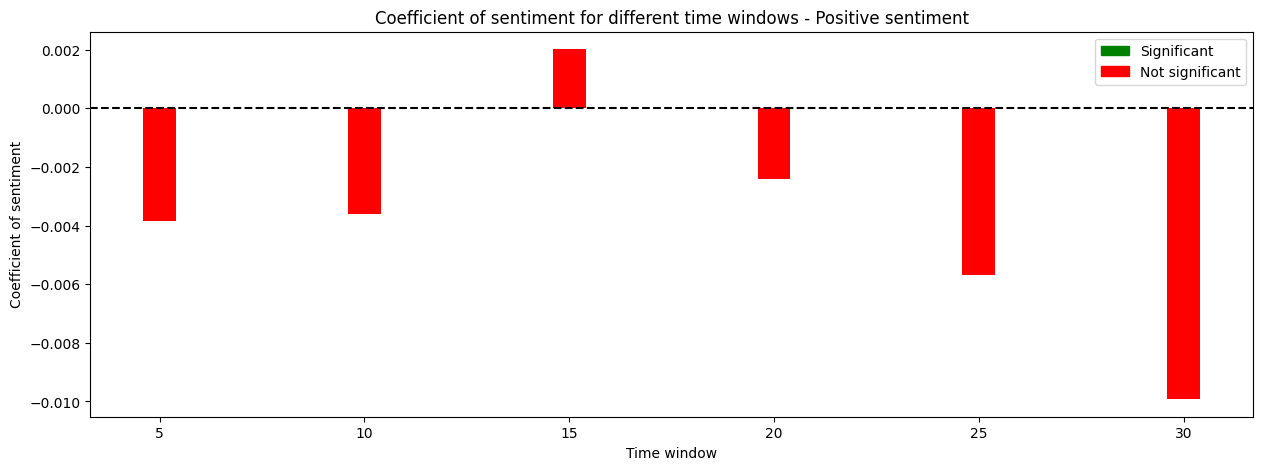

In [61]:
regression_analysis(df_pos, 'positive', time_windows, us_banks_returns, us_3fact, banks_events_flattened, mkt_daily_ret_US)

Negative sentiment

Initial regression results for negative sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.018
Date:                Fri, 27 Oct 2023   Prob (F-statistic):             0.0115
Time:                        09:53:41   Log-Likelihood:                 227.13
No. Observations:                 270   AIC:                            -442.3
Df Residuals:                     264   BIC:                            -420.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

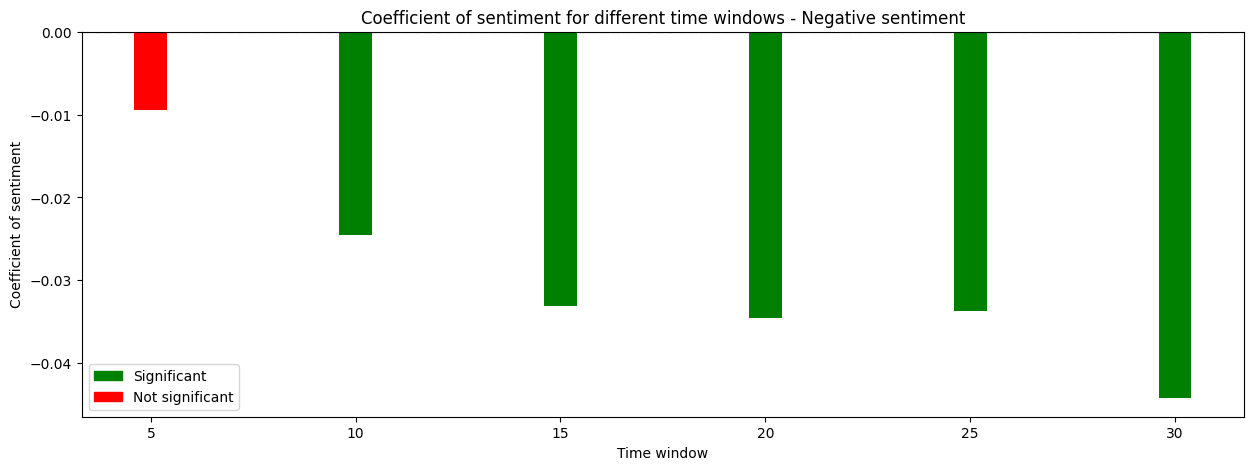

In [62]:
regression_analysis(df_neg, 'negative', time_windows, us_banks_returns, us_3fact, banks_events_flattened, mkt_daily_ret_US)

Neutral sentiment

Initial regression results for neutral sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.700
Date:                Fri, 27 Oct 2023   Prob (F-statistic):             0.0375
Time:                        09:53:45   Log-Likelihood:                 44.210
No. Observations:                  31   AIC:                            -82.42
Df Residuals:                      28   BIC:                            -78.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

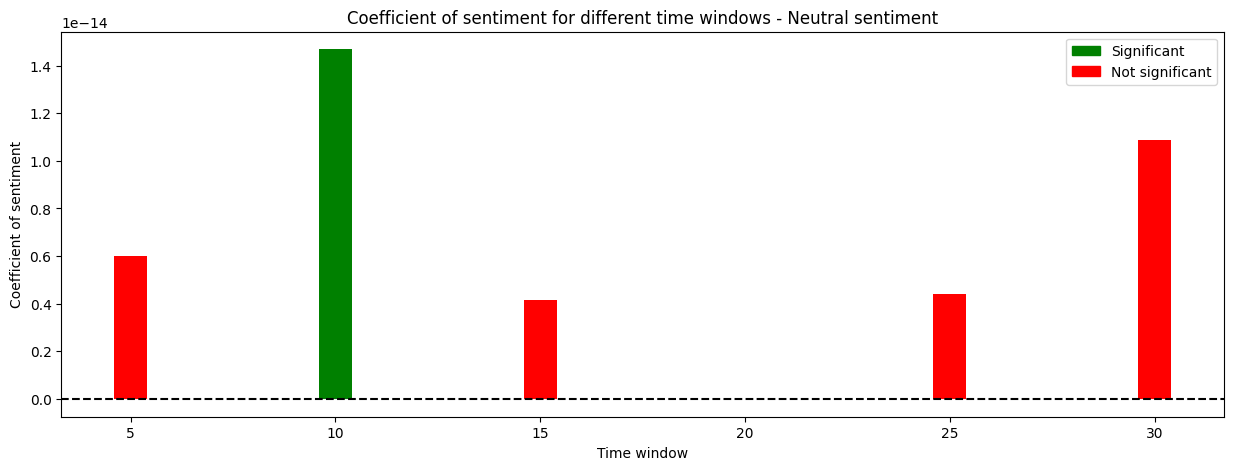

In [63]:
regression_analysis(df_neut, 'neutral', time_windows, us_banks_returns, us_3fact, banks_events_flattened, mkt_daily_ret_US)

Looking at the plots for US market, positive news seem not to affect CAR (since sentiment coefficient is always 0), while negative news always negatively affect CAR and neutral news positively affect them just if we consider short time windows.

# Task 3: **Analysis with our Sentiment Score**

Now we run the same test using the data generated from our own sentiment analysis, but since we got less data, we will not split data into negative, positive and neutral sentiment.

In [97]:
df_sent = pd.read_csv('Sent_Data/news_text_COMPLETE_option1.csv').drop(columns=['Unnamed: 0'])

In [98]:
df_eu = create_df_eu(car_eu, df_sent, mkt_daily_ret_EU)

In [99]:
df_us = create_df_us(car_us, df_sent, mkt_daily_ret_US)

## EU market

### Positive sentiment

Initial regression results for positive sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.290
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           0.000721
Time:                        09:57:58   Log-Likelihood:                 604.66
No. Observations:                1070   AIC:                            -1197.
Df Residuals:                    1064   BIC:                            -1167.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

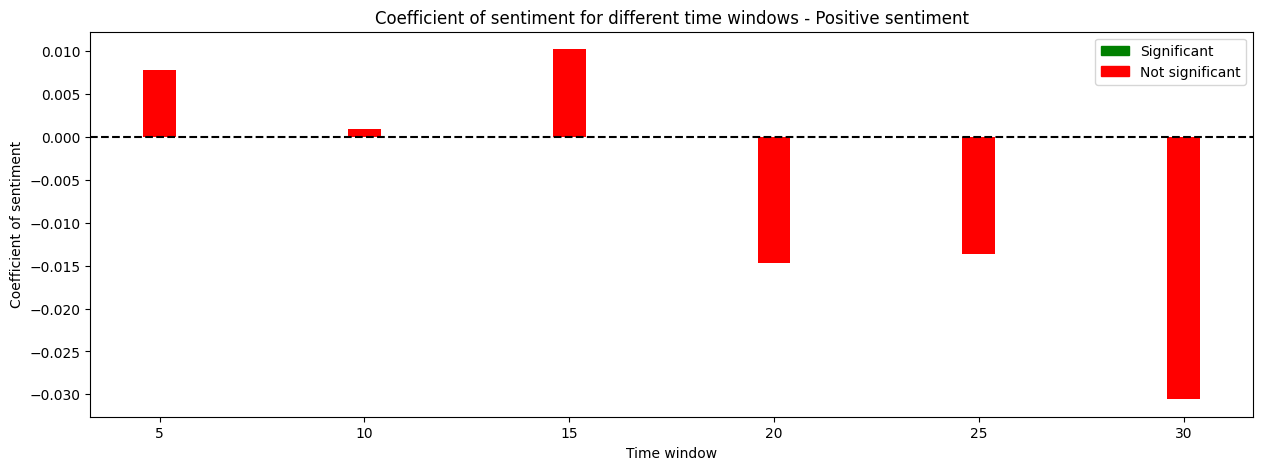

In [146]:
regression_analysis(df_eu, 'positive', time_windows, eu_banks_returns, eu_3fact, banks_events_flattened, mkt_daily_ret_EU)

### Negative sentiment

Initial regression results for negative sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.290
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           0.000721
Time:                        09:58:10   Log-Likelihood:                 604.66
No. Observations:                1070   AIC:                            -1197.
Df Residuals:                    1064   BIC:                            -1167.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

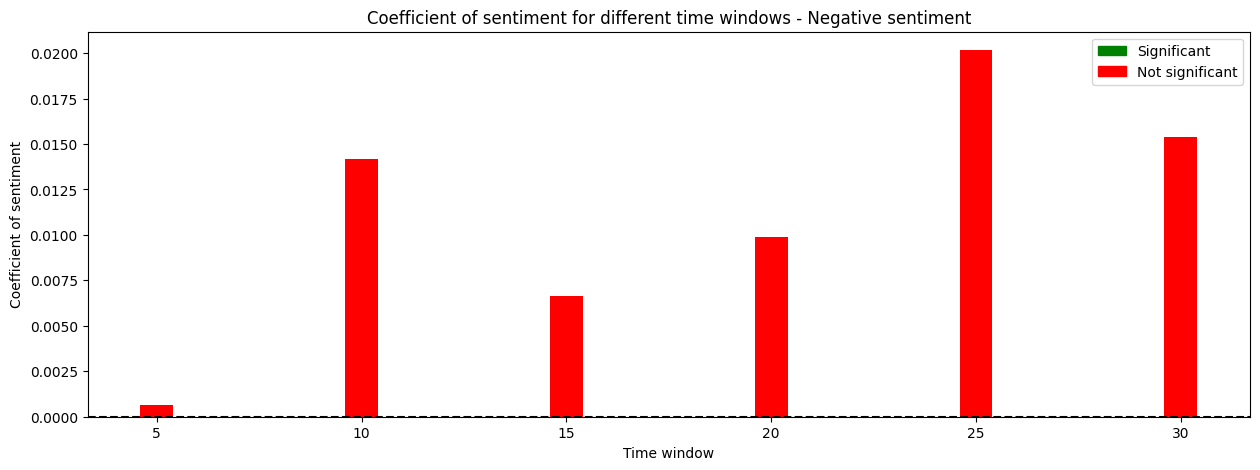

In [147]:
regression_analysis(df_eu, 'negative', time_windows, eu_banks_returns, eu_3fact, banks_events_flattened, mkt_daily_ret_EU)

### Neutral sentiment

Initial regression results for neutral sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.290
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           0.000721
Time:                        09:58:23   Log-Likelihood:                 604.66
No. Observations:                1070   AIC:                            -1197.
Df Residuals:                    1064   BIC:                            -1167.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

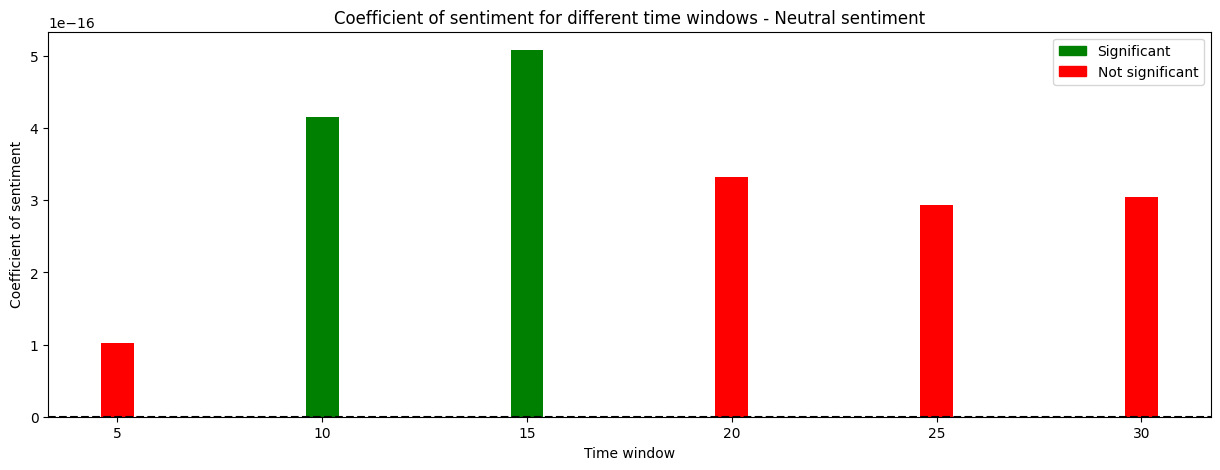

In [148]:
regression_analysis(df_eu, 'neutral', time_windows, eu_banks_returns, eu_3fact, banks_events_flattened, mkt_daily_ret_EU)

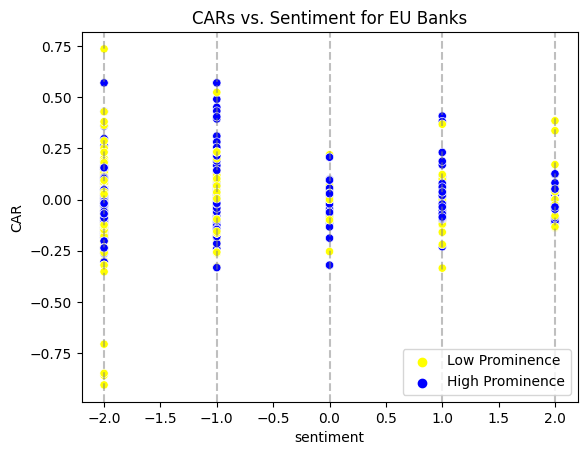

In [100]:

# Assuming df_eu is defined above this code
df_eu['prominence'] = df_eu['prominence'].map({0: 'low', 1: 'high'})

# Set up the palette for the prominence variable
palette = {'low': "blue", 'high': "yellow"}

# Create the scatterplot
sns.scatterplot(data=df_eu, x='sentiment', y='CAR', hue='prominence', palette=palette)

# Draw dashed lines for each unique sentiment value
for sentiment in df_eu['sentiment'].unique():
    plt.axvline(x=sentiment, color='grey', linestyle='--', alpha=0.5)

# Adjust the legend
legend_labels, _= plt.gca().get_legend_handles_labels()
plt.legend(legend_labels, ['Low Prominence', 'High Prominence'], loc='lower right')  # 'Prominence' label added

# Make title 'CARs vs. Sentiment for EU Banks'
plt.title('CARs vs. Sentiment for EU Banks')

# Show the plot
plt.show()


## US market

### Positive sentiment

Initial regression results for positive sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.928
Date:                Thu, 26 Oct 2023   Prob (F-statistic):            0.00179
Time:                        09:58:36   Log-Likelihood:                 298.51
No. Observations:                 335   AIC:                            -585.0
Df Residuals:                     329   BIC:                            -562.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

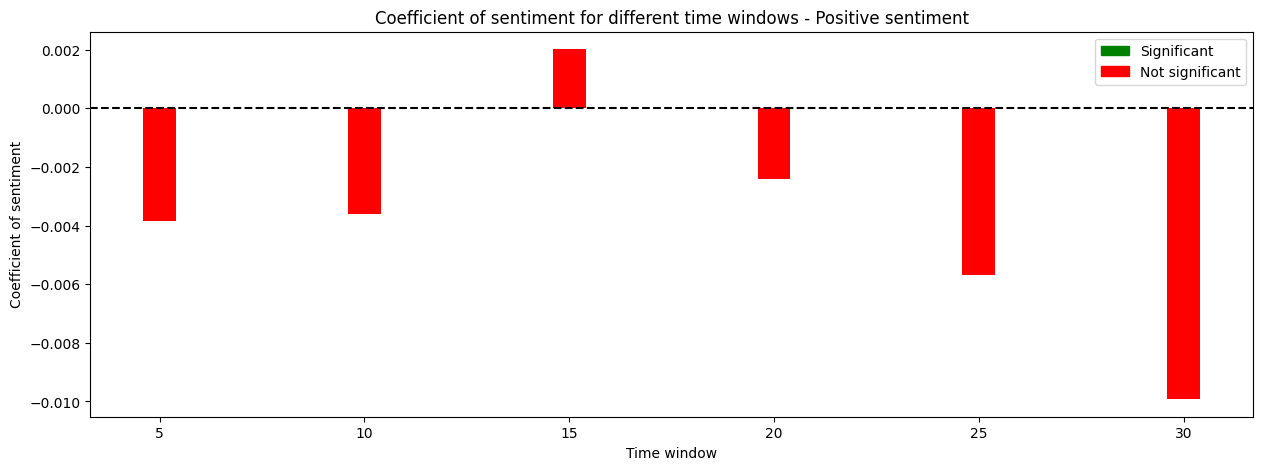

In [149]:
regression_analysis(df_us, 'positive', time_windows, us_banks_returns, us_3fact, banks_events_flattened, mkt_daily_ret_US)

Negative sentiment

Initial regression results for negative sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.928
Date:                Thu, 26 Oct 2023   Prob (F-statistic):            0.00179
Time:                        09:58:39   Log-Likelihood:                 298.51
No. Observations:                 335   AIC:                            -585.0
Df Residuals:                     329   BIC:                            -562.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

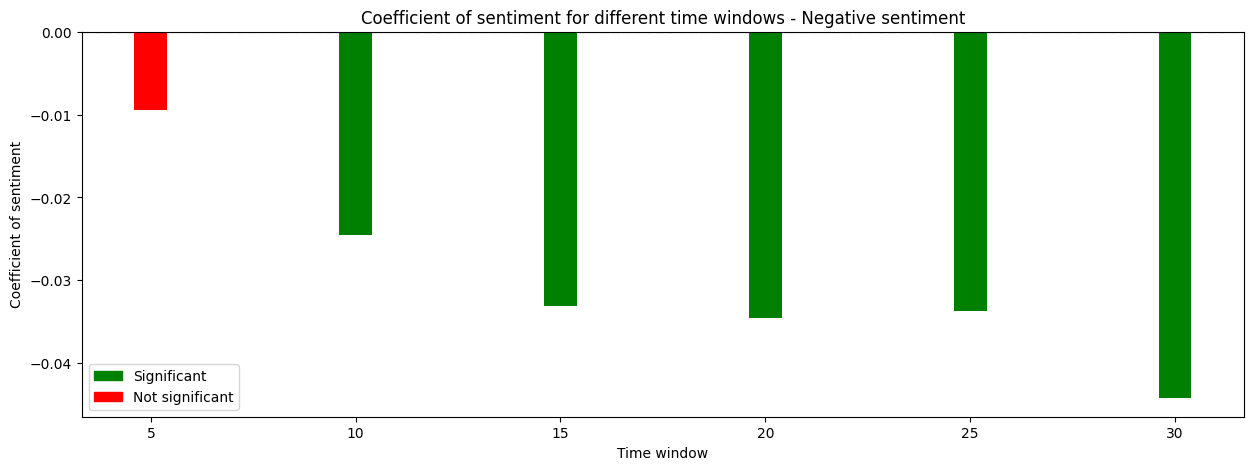

In [150]:
regression_analysis(df_us, 'negative', time_windows, us_banks_returns, us_3fact, banks_events_flattened, mkt_daily_ret_US)

### Neutral sentiment

Initial regression results for neutral sentiment:

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.928
Date:                Thu, 26 Oct 2023   Prob (F-statistic):            0.00179
Time:                        09:58:44   Log-Likelihood:                 298.51
No. Observations:                 335   AIC:                            -585.0
Df Residuals:                     329   BIC:                            -562.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

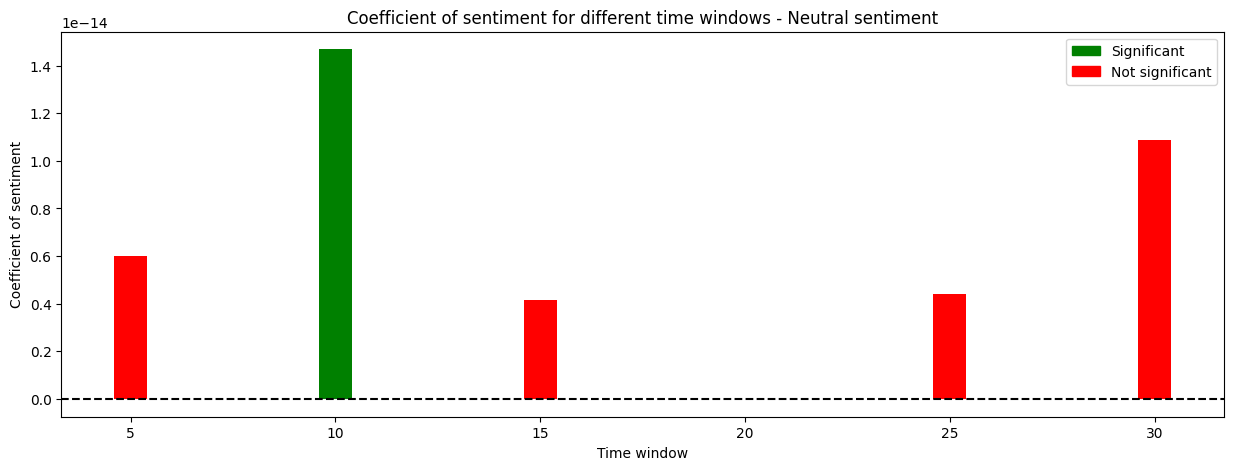

In [151]:
regression_analysis(df_us, 'neutral', time_windows, us_banks_returns, us_3fact, banks_events_flattened, mkt_daily_ret_US)

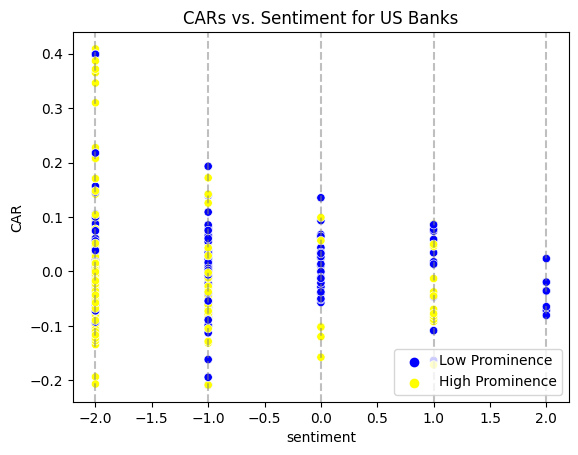

In [101]:

# Assuming df_eu is defined above this code
df_us['prominence'] = df_us['prominence'].map({0: 'low', 1: 'high'})

# Set up the palette for the prominence variable
palette = {'low': "blue", 'high': "yellow"}

# Create the scatterplot
sns.scatterplot(data=df_us, x='sentiment', y='CAR', hue='prominence', palette=palette)

# Draw dashed lines for each unique sentiment value
for sentiment in df_us['sentiment'].unique():
    plt.axvline(x=sentiment, color='grey', linestyle='--', alpha=0.5)

# Adjust the legend
legend_labels, _= plt.gca().get_legend_handles_labels()
plt.legend(legend_labels, ['Low Prominence', 'High Prominence'], loc='lower right')  # 'Prominence' label added

# Make title 'CARs vs. Sentiment for EU Banks'
plt.title('CARs vs. Sentiment for US Banks')

# Show the plot
plt.show()


**Negative news**, especially those with high prominence, have a generally expected negative impact on the bank's CARs. This aligns with general expectations — negative news, especially if widely circulated or highlighted (high prominence), can erode investor confidence and lead to stock price declines.
However, the fact that some stocks reacted positively to high-prominence negative news is intriguing. It suggests that other factors, not captured in the dataset, influenced investor behavior. It could be internal factors specific to the bank, or it might reflect broader market conditions or investor sentiment

**Neutral news**: largely non-prominent and hence having minimal impact on CARs is insightful. It suggests that in the absence of strong sentiments (either positive or negative), news doesn't move the market significantly unless it's of high prominence

**Positive news**: inverse relationship with CARs, though counterintuitive, is backed by Krueger's findings:

– Findings 1: Investors respond strongly negatively to negative events and weakly negatively to positive events

– Findings 2: CSR news with stronger legal and economic information content generates a more pronounced investor reaction

It's especially interesting that positive news, despite being less frequent in this dataset, seems to have a negative correlation with CARs.
Krueger's observation that investors respond "weakly negatively to positive events" could be due to several reasons: perhaps positive news raises investor expectations too high or maybe the market is skeptical of overly positive news and fears it's masking deeper issues